In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
def load_data(folder_path):
  data = []
  for filename in os.listdir(folder_path):
    if filename.endswith(".npy"):
      file_path = os.path.join(folder_path, filename)
      loaded_data = np.load(file_path, allow_pickle=True)
      data.append(loaded_data[0])
  data = np.array(data)
  return data

In [ ]:
axial_data = load_data("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial")
coronal_data = load_data("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal")
sagittal_data = load_data("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal")

In [ ]:
# Reshape data for flattening (assuming the first dimension is the number of samples)
axial_flat = axial_data.reshape(axial_data.shape[0], -1)
coronal_flat = coronal_data.reshape(coronal_data.shape[0], -1)
sagittal_flat = sagittal_data.reshape(sagittal_data.shape[0], -1)

In [ ]:
# Load ACL labels (assuming header=None for missing header row)
acl_annotation = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv", header=None)
acl_label = acl_annotation.iloc[:, 1].values  # Extract labels from second column

# Load abnormal labels (fix typo in 'head')
abnormal_annotation = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv", header=None)  # Assuming header is present
abnormal_label = abnormal_annotation.iloc[:, 1].values  # Extract labels from second column

# Load meniscus labels (fix typo in 'head')
meniscus_annotation = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv", header=None)  # Assuming header is present
meniscus_label = meniscus_annotation.iloc[:, 1].values  # Extract labels from second column


In [ ]:

# Shuffle data (indices) and apply shuffling to all data and labels
indices = np.arange(len(axial_data))
np.random.shuffle(indices)
axial_flat = axial_flat[indices]
coronal_flat = coronal_flat[indices]
sagittal_flat = sagittal_flat[indices]
acl_label = acl_label[indices]
abnormal_label = abnormal_label[indices]
meniscus_label = meniscus_label[indices]

# Load validation data
axial_data = load_data("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial")
coronal_data = load_data("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal")
sagittal_data = load_data("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal")

# Reshape validation data
axial_test_flat = axial_data.reshape(axial_data.shape[0], -1)
coronal_test_flat = coronal_data.reshape(coronal_data.shape[0], -1)
sagittal_test_flat = sagittal_data.reshape(sagittal_data.shape[0], -1)

In [ ]:
# Load validation labels (assuming header=None for missing header row)
acl_test_annotation = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv", header=None)
acl_test_label = acl_test_annotation.iloc[:, 1].values  # Extract labels from second column

# Fix typos in abnormal and meniscus label loading
abnormal_test_annotation = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv", header=None)  # Assuming header is present
abnormal_test_label = abnormal_test_annotation.iloc[:, 1].values  # Extract labels from second column

meniscus_test_annotation = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv", header=None)  # Assuming header is present
meniscus_test_label = meniscus_test_annotation.iloc[:, 1].values  # Extract labels from second column

In [ ]:
# Concatenate training data (assuming axial, coronal, sagittal have same number of samples)
X_train_ACL = np.concatenate((axial_flat, coronal_flat, sagittal_flat), axis=1)
Y_train_ACL = acl_label

# Concatenate test data (assuming axial_test_flat, etc. have same number of samples)
X_test_ACL = np.concatenate((axial_test_flat, coronal_test_flat, sagittal_test_flat), axis=1)
Y_test_ACL = acl_test_label

In [ ]:
X_train_ABNORMAL = np.concatenate((axial_flat, coronal_flat, sagittal_flat), axis=1)
Y_train_ABNORMAL = abnormal_label

X_test_ABNORMAL = np.concatenate((axial_test_flat, coronal_test_flat, sagittal_test_flat), axis=1)
Y_test_ABNORMAL = abnormal_test_label

In [ ]:
# Prepare Meniscus data
X_train_MENISCUS = np.concatenate((axial_flat, coronal_flat, sagittal_flat), axis=1)
Y_train_MENISCUS = meniscus_label

X_test_MENISCUS = np.concatenate((axial_test_flat, coronal_test_flat, sagittal_test_flat), axis=1)
Y_test_MENISCUS = meniscus_test_label

Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.83      0.65        66
           1       0.39      0.13      0.19        54

    accuracy                           0.52       120
   macro avg       0.46      0.48      0.42       120
weighted avg       0.47      0.52      0.45       120



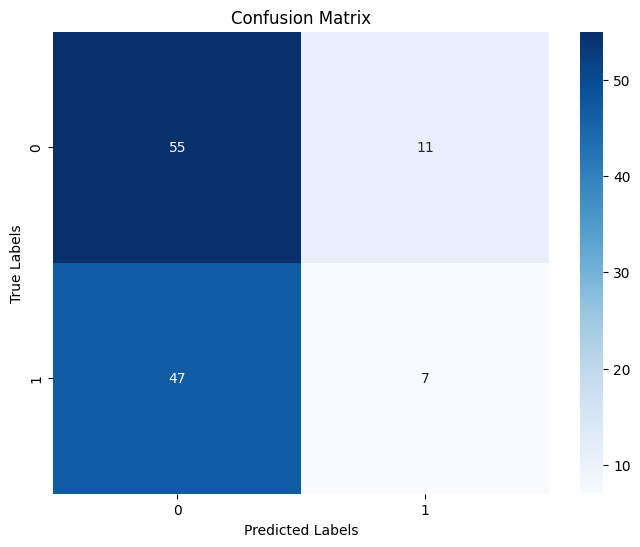

In [ ]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is installed (install with 'pip install seaborn')

# Initialize AdaBoost classifier
ada_classifier = AdaBoostClassifier()

# Train the classifier
ada_classifier.fit(X_train_ACL, Y_train_ACL)

# Make predictions on the test data
Y_pred_ACL = ada_classifier.predict(X_test_ACL)

# Calculate accuracy
accuracy = accuracy_score(Y_test_ACL, Y_pred_ACL)
print(f"Accuracy: {accuracy:.2f}")

# Get the classification report for precision, recall, and f1-score
report = classification_report(Y_test_ACL, Y_pred_ACL)
print("Classification Report:\n", report)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test_ACL, Y_pred_ACL)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.55
Classification Report:
               precision    recall  f1-score   support

           0       0.55      1.00      0.71        66
           1       0.00      0.00      0.00        54

    accuracy                           0.55       120
   macro avg       0.28      0.50      0.35       120
weighted avg       0.30      0.55      0.39       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


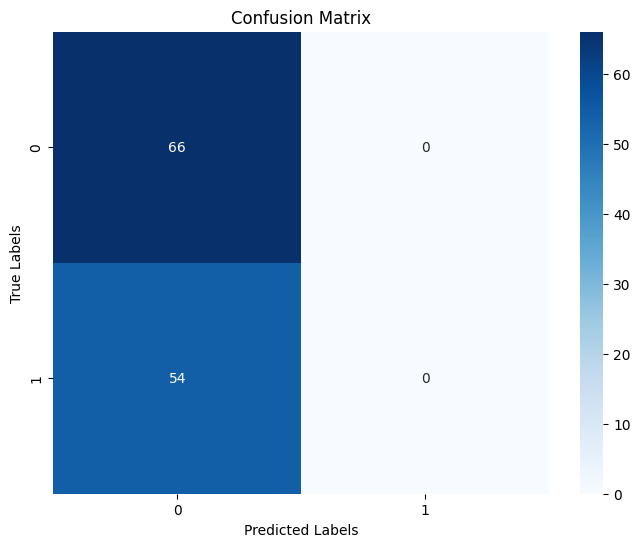

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is installed (install with 'pip install seaborn')

# Initialize Logistic Regression with a higher max_iter value
logistic_regression = LogisticRegression(max_iter=1000)

# Initialize StandardScaler and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ACL)
X_test_scaled = scaler.transform(X_test_ACL)

# Initialize Logistic Regression on scaled data
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, Y_train_ACL)


# Define base estimators for stacking
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('lr', LogisticRegression())
]

# Initialize stacking classifier with meta-classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking classifier
stacking_classifier.fit(X_train_ACL, Y_train_ACL)

# Make predictions on the test data
Y_pred_ACL_stacking = stacking_classifier.predict(X_test_ACL)

# Calculate accuracy
accuracy = accuracy_score(Y_test_ACL, Y_pred_ACL_stacking)
print(f"Accuracy: {accuracy:.2f}")

# Get the classification report for precision, recall, and f1-score
report = classification_report(Y_test_ACL, Y_pred_ACL_stacking)
print("Classification Report:\n", report)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test_ACL, Y_pred_ACL_stacking)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.61      0.62        66
           1       0.54      0.57      0.56        54

    accuracy                           0.59       120
   macro avg       0.59      0.59      0.59       120
weighted avg       0.59      0.59      0.59       120



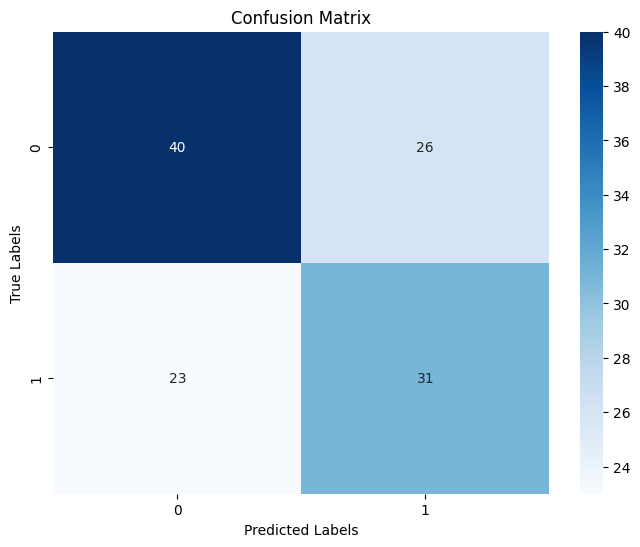

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is installed (install with 'pip install seaborn')

# Initialize base classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier()

# Initialize Bagging classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the Bagging classifier
bagging_classifier.fit(X_train_ACL, Y_train_ACL)

# Make predictions on the test data
Y_pred_ACL_bagging = bagging_classifier.predict(X_test_ACL)

# Calculate accuracy
accuracy = accuracy_score(Y_test_ACL, Y_pred_ACL_bagging)
print(f"Accuracy: {accuracy:.2f}")

# Get the classification report for precision, recall, and f1-score
report = classification_report(Y_test_ACL, Y_pred_ACL_bagging)
print("Classification Report:\n", report)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test_ACL, Y_pred_ACL_bagging)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.04      0.07        25
           1       0.79      0.96      0.87        95

    accuracy                           0.77       120
   macro avg       0.50      0.50      0.47       120
weighted avg       0.67      0.77      0.70       120



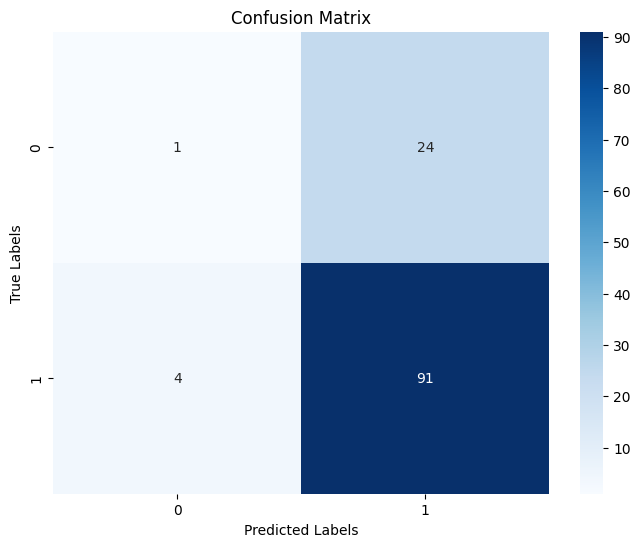

In [ ]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is installed (install with 'pip install seaborn')

# Initialize AdaBoost classifier
ada_classifier = AdaBoostClassifier()

# Train the classifier
ada_classifier.fit(X_train_ABNORMAL, Y_train_ABNORMAL)

# Make predictions on the test data
Y_pred_ABNORMAL = ada_classifier.predict(X_test_ABNORMAL)

# Calculate accuracy
accuracy = accuracy_score(Y_test_ABNORMAL, Y_pred_ABNORMAL)
print(f"Accuracy: {accuracy:.2f}")

# Get the classification report for precision, recall, and f1-score
report = classification_report(Y_test_ABNORMAL, Y_pred_ABNORMAL)
print("Classification Report:\n", report)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test_ABNORMAL, Y_pred_ABNORMAL)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


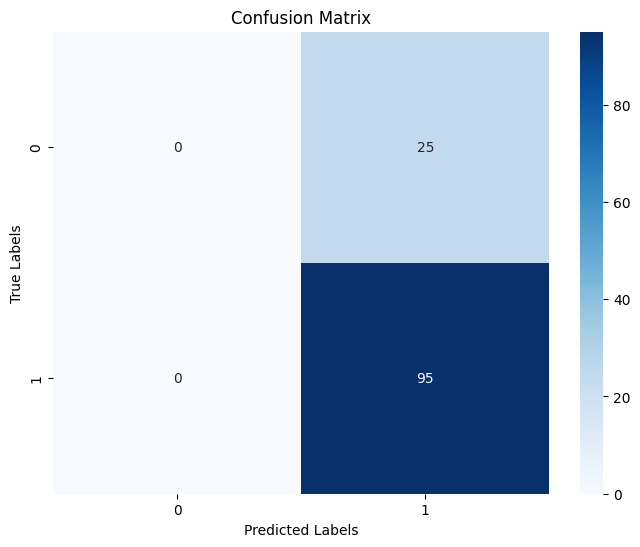

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is installed (install with 'pip install seaborn')

# Define base estimators for stacking
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('lr', LogisticRegression())
]

# Initialize stacking classifier with meta-classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking classifier
stacking_classifier.fit(X_train_ABNORMAL, Y_train_ABNORMAL)

# Make predictions on the test data
Y_pred_ABNORMAL_stacking = stacking_classifier.predict(X_test_ABNORMAL)

# Calculate accuracy
accuracy = accuracy_score(Y_test_ABNORMAL, Y_pred_ABNORMAL_stacking)
print(f"Accuracy: {accuracy:.2f}")

# Get the classification report for precision, recall, and f1-score
report = classification_report(Y_test_ABNORMAL, Y_pred_ABNORMAL_stacking)
print("Classification Report:\n", report)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test_ABNORMAL, Y_pred_ABNORMAL_stacking)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Accuracy: 0.38
Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.20      0.12        25
           1       0.67      0.43      0.53        95

    accuracy                           0.38       120
   macro avg       0.38      0.32      0.32       120
weighted avg       0.55      0.38      0.44       120



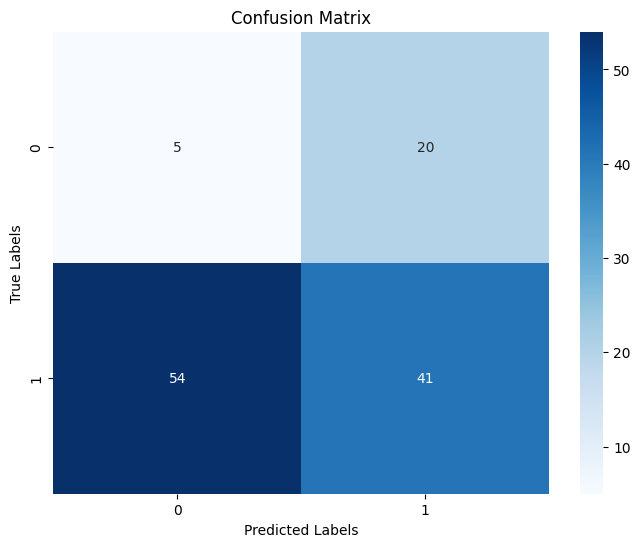

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is installed (install with 'pip install seaborn')

# Initialize base classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier()

# Initialize Bagging classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the Bagging classifier
bagging_classifier.fit(X_train_ABNORMAL, Y_train_ABNORMAL)

# Make predictions on the test data
Y_pred_ABNORMAL_bagging = bagging_classifier.predict(X_test_ABNORMAL)

# Calculate accuracy
accuracy = accuracy_score(Y_test_ABNORMAL, Y_pred_ABNORMAL_bagging)
print(f"Accuracy: {accuracy:.2f}")

# Get the classification report for precision, recall, and f1-score
report = classification_report(Y_test_ABNORMAL, Y_pred_ABNORMAL_bagging)
print("Classification Report:\n", report)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test_ABNORMAL, Y_pred_ABNORMAL_bagging)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Accuracy: 0.51
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.82      0.65        68
           1       0.29      0.10      0.14        52

    accuracy                           0.51       120
   macro avg       0.42      0.46      0.40       120
weighted avg       0.44      0.51      0.43       120



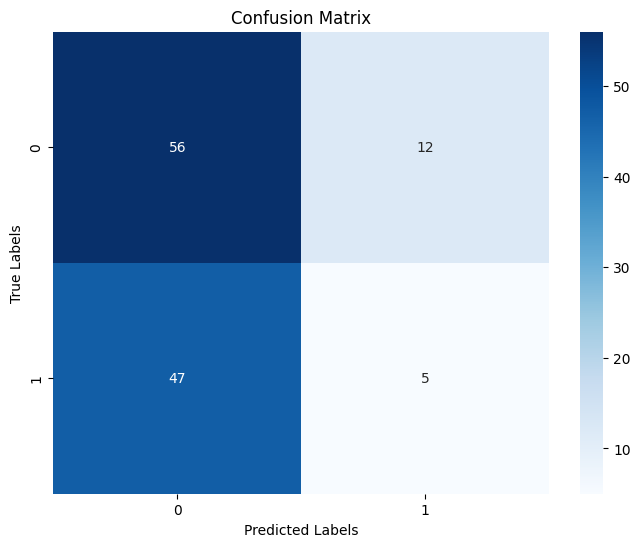

In [ ]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is installed (install with 'pip install seaborn')

# Initialize AdaBoost classifier
ada_classifier = AdaBoostClassifier()

# Train the classifier
ada_classifier.fit(X_train_MENISCUS, Y_train_MENISCUS)

# Make predictions on the test data
Y_pred_MENISCUS = ada_classifier.predict(X_test_MENISCUS)

# Calculate accuracy
accuracy = accuracy_score(Y_test_MENISCUS, Y_pred_MENISCUS)
print(f"Accuracy: {accuracy:.2f}")

# Get the classification report for precision, recall, and f1-score
report = classification_report(Y_test_MENISCUS, Y_pred_MENISCUS)
print("Classification Report:\n", report)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test_MENISCUS, Y_pred_MENISCUS)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.72        68
           1       0.00      0.00      0.00        52

    accuracy                           0.57       120
   macro avg       0.28      0.50      0.36       120
weighted avg       0.32      0.57      0.41       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


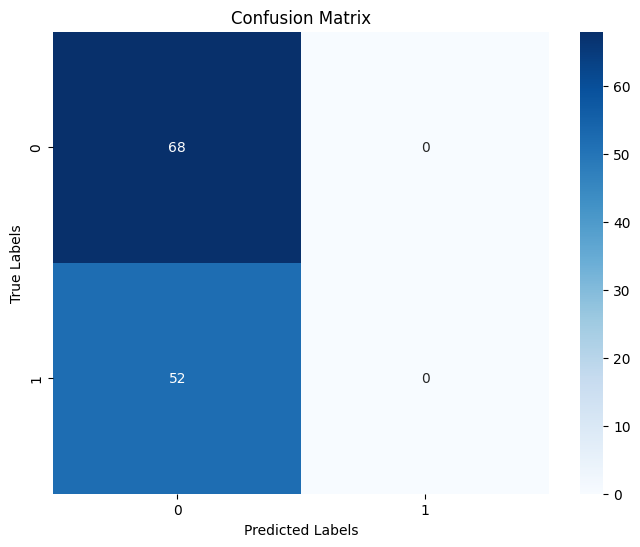

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is installed (install with 'pip install seaborn')

# Define base estimators for stacking
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('lr', LogisticRegression())
]

# Initialize stacking classifier with meta-classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking classifier
stacking_classifier.fit(X_train_MENISCUS, Y_train_MENISCUS)

# Make predictions on the test data
Y_pred_MENISCUS_stacking = stacking_classifier.predict(X_test_MENISCUS)

# Calculate accuracy
accuracy = accuracy_score(Y_test_MENISCUS, Y_pred_MENISCUS_stacking)
print(f"Accuracy: {accuracy:.2f}")

# Get the classification report for precision, recall, and f1-score
report = classification_report(Y_test_MENISCUS, Y_pred_MENISCUS_stacking)
print("Classification Report:\n", report)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test_MENISCUS, Y_pred_MENISCUS_stacking)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76        68
           1       0.70      0.62      0.65        52

    accuracy                           0.72       120
   macro avg       0.71      0.70      0.71       120
weighted avg       0.71      0.72      0.71       120



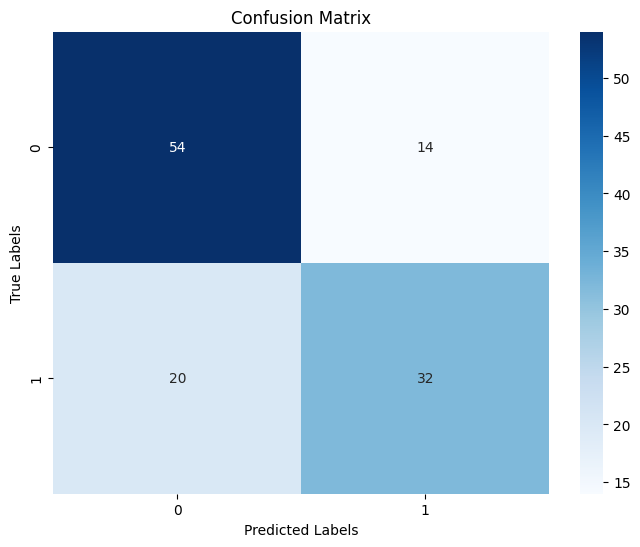

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is installed (install with 'pip install seaborn')

# Initialize base classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier()

# Initialize Bagging classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the Bagging classifier
bagging_classifier.fit(X_train_MENISCUS, Y_train_MENISCUS)

# Make predictions on the test data
Y_pred_MENISCUS_bagging = bagging_classifier.predict(X_test_MENISCUS)

# Calculate accuracy
accuracy = accuracy_score(Y_test_MENISCUS, Y_pred_MENISCUS_bagging)
print(f"Accuracy: {accuracy:.2f}")

# Get the classification report for precision, recall, and f1-score
report = classification_report(Y_test_MENISCUS, Y_pred_MENISCUS_bagging)
print("Classification Report:\n", report)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test_MENISCUS, Y_pred_MENISCUS_bagging)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


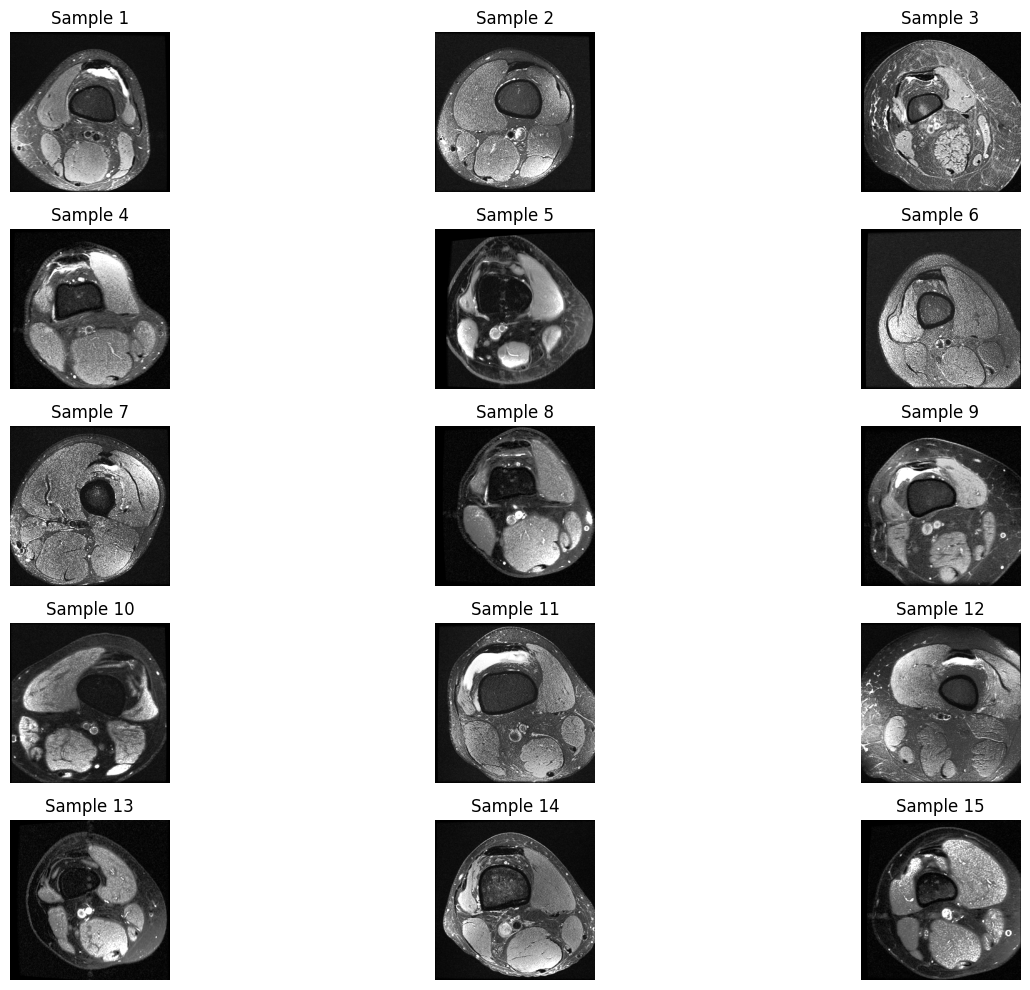

In [ ]:
import matplotlib.pyplot as plt

def visualize_sample_images(images, n_samples=5):
    fig, axes = plt.subplots(nrows=n_samples, ncols=3, figsize=(15, 10))
    for i, ax in enumerate(axes.flat):
        height, width = 256, 256

        # Reshape the flattened image back to 2D
        img_2d = images[i].reshape(height, width)

        ax.imshow(img_2d, cmap='gray')
        ax.axis('off')
        ax.set_title(f'Sample {i+1}')
    plt.tight_layout()
    plt.show()

# Example usage for axial images
visualize_sample_images(axial_flat[:1129])


In [ ]:
!pip install numpy pillow


In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis

def extract_statistical_features_from_npy(image_path):
    # Load the.npy file
    image_array = np.load(image_path)

    # Calculate statistical features
    mean = np.mean(image_array)
    std_dev = np.std(image_array)
    var = np.var(image_array)
    skewness = skew(image_array.flatten())
    kurt = kurtosis(image_array.flatten())
    min_pixel = np.min(image_array)
    max_pixel = np.max(image_array)
    median = np.median(image_array)

    # Store features in a dictionary
    features = {
        'mean': mean,
        'std_dev': std_dev,
        'variance': var,
        'skewness': skewness,
        'kurtosis': kurt,
        'min_pixel': min_pixel,
        'max_pixel': max_pixel,
        'median': median
    }

    return features

# Example usage
image_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial/0000.npy'
features = extract_statistical_features_from_npy(image_path)
for feature_name, value in features.items():
    print(f"{feature_name}: {value}")

#textural, shift and hog features of this image


mean: 63.24502667513761
std_dev: 60.51848986444974
variance: 3662.487615473506
skewness: 1.1380741755916308
kurtosis: 0.43988614744254173
min_pixel: 0
max_pixel: 255
median: 32.0


In [ ]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops

def extract_textural_features_from_npy(image_path):
    # Load the .npy file
    image_array = np.load(image_path)

    # Check if the image is 3D (volumetric data)
    if image_array.ndim == 3:
        features_list = []
        # Iterate through each slice
        for i in range(image_array.shape[2]):
            slice_2d = image_array[:, :, i]

            # Check for constant slice (avoid division by zero)
            if np.min(slice_2d) == np.max(slice_2d):
                # Assign a constant value to avoid NaNs
                slice_2d_normalized = np.zeros_like(slice_2d)
            else:
                # Normalize the 2D slice to 0-255
                slice_2d_normalized = (slice_2d - np.min(slice_2d)) / (np.max(slice_2d) - np.min(slice_2d))
                slice_2d_normalized = (slice_2d_normalized * 255).astype(np.uint8)

            # Calculate GLCM
            glcm = graycomatrix(slice_2d_normalized, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

            # Extract GLCM properties
            contrast = graycoprops(glcm, 'contrast')[0, 0]
            dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
            homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
            energy = graycoprops(glcm, 'energy')[0, 0]
            correlation = graycoprops(glcm, 'correlation')[0, 0]
            asm = graycoprops(glcm, 'ASM')[0, 0]

            features_list.append([contrast, dissimilarity, homogeneity, energy, correlation, asm])

        # Calculate the mean of the features across all slices
        features_array = np.array(features_list)
        mean_features = np.mean(features_array, axis=0)

        # Store textural features in a dictionary
        textural_features = {
            'contrast': mean_features[0],
            'dissimilarity': mean_features[1],
            'homogeneity': mean_features[2],
            'energy': mean_features[3],
            'correlation': mean_features[4],
            'ASM': mean_features[5]
        }
    else:
        # Check for constant image (avoid division by zero)
        if np.min(image_array) == np.max(image_array):
            # Assign a constant value to avoid NaNs
            image_array_normalized = np.zeros_like(image_array)
        else:
            # Normalize the 2D image to 0-255
            image_array_normalized = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))
            image_array_normalized = (image_array_normalized * 255).astype(np.uint8)

        # Calculate GLCM
        glcm = graycomatrix(image_array_normalized, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

        # Extract GLCM properties
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]
        asm = graycoprops(glcm, 'ASM')[0, 0]

        # Store textural features in a dictionary
        textural_features = {
            'contrast': contrast,
            'dissimilarity': dissimilarity,
            'homogeneity': homogeneity,
            'energy': energy,
            'correlation': correlation,
            'ASM': asm
        }

    return textural_features

# Example usage
image_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial/0000.npy'
textural_features = extract_textural_features_from_npy(image_path)
for feature_name, value in textural_features.items():
    print(f"{feature_name}: {value}")


contrast: 449.80120912711686
dissimilarity: 11.343537279968809
homogeneity: 0.20208231736866747
energy: 0.06449088059040696
correlation: 0.9160730304023824
ASM: 0.02270849524509406


HOG features: [0.29589987 0.07867895 0.0493328  ... 0.18463139 0.20671982 0.2056379 ]
Number of HOG features: 4464


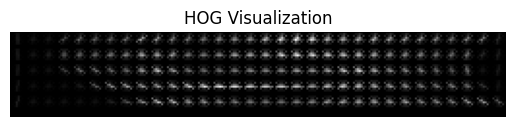

In [ ]:
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt

def extract_and_visualize_hog_features_from_npy(image_path, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9):
    # Load the .npy file
    image_array = np.load(image_path)

    # Function to normalize and compute HOG for a 2D slice
    def compute_hog(slice_2d):
        if np.min(slice_2d) != np.max(slice_2d):
            slice_2d = (slice_2d - np.min(slice_2d)) / (np.max(slice_2d) - np.min(slice_2d))
            slice_2d = (slice_2d * 255).astype(np.uint8)
        else:
            slice_2d = np.zeros_like(slice_2d, dtype=np.uint8)

        hog_features, hog_image = hog(slice_2d, orientations=orientations, pixels_per_cell=pixels_per_cell,
                                      cells_per_block=cells_per_block, block_norm='L2-Hys', visualize=True, channel_axis=None)
        return hog_features, hog_image

    # Check if the image is 3D (volumetric data)
    if image_array.ndim == 3:
        features_list = []
        hog_images = []
        # Iterate through each slice
        for i in range(image_array.shape[2]):
            slice_2d = image_array[:, :, i]
            hog_features, hog_image = compute_hog(slice_2d)
            features_list.append(hog_features)
            hog_images.append(hog_image)

        # Calculate the mean of the features across all slices
        features_array = np.array(features_list)
        mean_features = np.mean(features_array, axis=0)

        # Aggregate HOG visualizations by taking the mean image
        mean_hog_image = np.mean(np.array(hog_images), axis=0)

        hog_features = mean_features
    else:
        hog_features, mean_hog_image = compute_hog(image_array)

    return hog_features, mean_hog_image

# Example usage
image_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial/0000.npy'
hog_features, hog_image = extract_and_visualize_hog_features_from_npy(image_path)

# Print HOG features
print(f"HOG features: {hog_features}")
print(f"Number of HOG features: {len(hog_features)}")

# Display HOG visualization
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Visualization")
plt.axis('off')
plt.show()


Shape of the loaded data: (44, 256, 256)


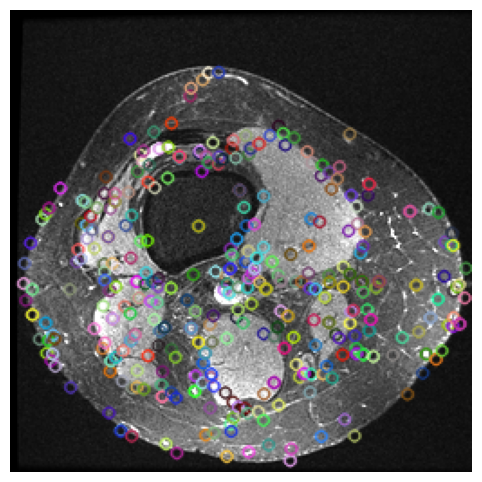

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load .npy file
data = np.load('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial/0000.npy')

# Check the shape of the data
print(f"Shape of the loaded data: {data.shape}")

# Check if data is grayscale or color
if len(data.shape) == 2:  # Grayscale image
    gray1 = data.astype(np.uint8)  # Convert to uint8 if necessary
    img1 = cv2.cvtColor(gray1, cv2.COLOR_GRAY2BGR)
elif len(data.shape) == 3:
    if data.shape[2] == 3:  # Color image (assuming RGB)
        img1 = data.astype(np.uint8)  # Convert to uint8 if necessary
    elif data.shape[0] > 1:  # Handle case where multiple slices are present
        # For demonstration, let's just select the first slice
        gray1 = data[0].astype(np.uint8)  # Convert to uint8 if necessary
        img1 = cv2.cvtColor(gray1, cv2.COLOR_GRAY2BGR)
    else:
        raise ValueError("Unsupported image format in .npy file")
else:
    raise ValueError("Unsupported image format in .npy file")

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)

# Draw keypoints on original image (whether grayscale or color)
img_with_keypoints = cv2.drawKeypoints(img1, keypoints_1, None)

# Display the result
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

def extract_statistical_features_from_all_images(directory_path, save_path):
    all_features = []
    for filename in os.listdir(directory_path):
        if filename.endswith('.npy'):
            image_path = os.path.join(directory_path, filename)
            features = extract_statistical_features_from_npy(image_path)
            features['image'] = filename[:-4]
            all_features.append(features)
    features_df = pd.DataFrame(all_features)
    features_df.to_csv(save_path, index=False)
    return features_df

def extract_statistical_features_from_npy(image_path):
    image_array = np.load(image_path)
    mean = np.mean(image_array)
    std_dev = np.std(image_array)
    var = np.var(image_array)
    skewness = skew(image_array.flatten())
    kurt = kurtosis(image_array.flatten())
    min_pixel = np.min(image_array)
    max_pixel = np.max(image_array)
    median = np.median(image_array)
    features = {
        'mean': mean,
        'std_dev': std_dev,
        'variance': var,
        'skewness': skewness,
        'kurtosis': kurt,
        'min_pixel': min_pixel,
        'max_pixel': max_pixel,
        'median': median
    }
    return features

def load_features_from_csv(file_path):
    return pd.read_csv(file_path)

# Paths for saving the features
train_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/'
valid_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/'

axial_train_save_path = os.path.join(train_dir, 'axial_statistical_features.csv')
coronal_train_save_path = os.path.join(train_dir, 'coronal_statistical_features.csv')
sagittal_train_save_path = os.path.join(train_dir, 'sagittal_statistical_features.csv')

axial_valid_save_path = os.path.join(valid_dir, 'axial_statistical_test_features.csv')
coronal_valid_save_path = os.path.join(valid_dir, 'coronal_statistical_test_features.csv')
sagittal_valid_save_path = os.path.join(valid_dir, 'sagittal_statistical_test_features.csv')

# Extract and save features for training data
axial_features_df = extract_statistical_features_from_all_images(train_dir + 'axial/', axial_train_save_path)
coronal_features_df = extract_statistical_features_from_all_images(train_dir + 'coronal/', coronal_train_save_path)
sagittal_features_df = extract_statistical_features_from_all_images(train_dir + 'sagittal/', sagittal_train_save_path)

# Extract and save features for validation data
axial_test_features_df = extract_statistical_features_from_all_images(valid_dir + 'axial/', axial_valid_save_path)
coronal_test_features_df = extract_statistical_features_from_all_images(valid_dir + 'coronal/', coronal_valid_save_path)
sagittal_test_features_df = extract_statistical_features_from_all_images(valid_dir + 'sagittal/', sagittal_valid_save_path)

# Load features from CSV files
axial_features_df = load_features_from_csv(axial_train_save_path)
coronal_features_df = load_features_from_csv(coronal_train_save_path)
sagittal_features_df = load_features_from_csv(sagittal_train_save_path)

axial_test_features_df = load_features_from_csv(axial_valid_save_path)
coronal_test_features_df = load_features_from_csv(coronal_valid_save_path)
sagittal_test_features_df = load_features_from_csv(sagittal_valid_save_path)

print(axial_features_df)
print(coronal_features_df)
print(sagittal_features_df)

print(axial_test_features_df)
print(coronal_test_features_df)
print(sagittal_test_features_df)


           mean    std_dev     variance  skewness  kurtosis  min_pixel  \
0     65.258476  60.098970  3611.886245  1.097176  0.390473          0   
1     53.890594  60.146120  3617.555786  1.354711  1.063138          0   
2     62.099267  58.363511  3406.299459  1.215056  0.815599          0   
3     58.297550  58.864896  3465.075940  1.258976  0.947330          0   
4     73.983664  57.235587  3275.912460  1.069921  0.540848          0   
...         ...        ...          ...       ...       ...        ...   
1125  58.587056  62.273771  3878.022570  1.203935  0.495416          0   
1126  76.738679  59.346396  3521.994749  0.869173  0.111685          0   
1127  50.384717  55.553980  3086.244733  1.679383  2.218208          0   
1128  54.106114  55.622431  3093.854855  1.610316  2.005145          0   
1129  66.041601  61.915698  3833.553605  1.027544  0.194878          0   

      max_pixel  median  image  
0           255    43.0    135  
1           255    22.0    123  
2           

Accuracy: 0.5416666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.95      0.70        66
           1       0.40      0.04      0.07        54

    accuracy                           0.54       120
   macro avg       0.47      0.50      0.38       120
weighted avg       0.48      0.54      0.41       120



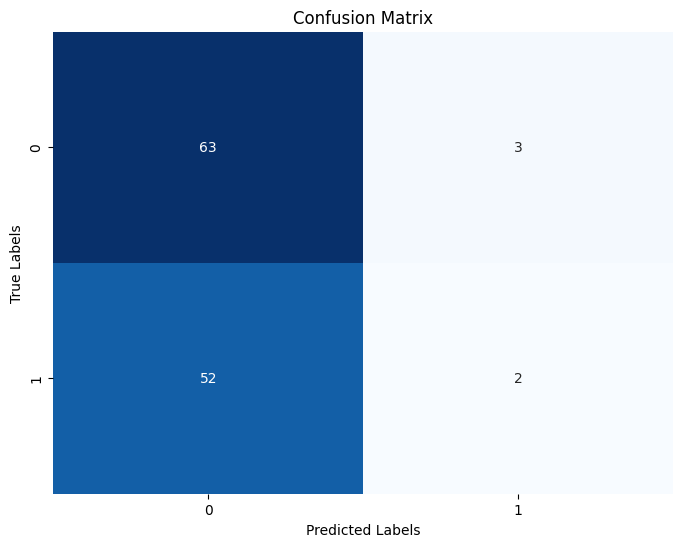

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
acl_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv", header=None)
acl_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv", header=None)

# Extract labels from the second column
y_train = acl_train_labels.iloc[:, 1].values
y_test = acl_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoost classifier
ada_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the AdaBoost classifier
ada_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = ada_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.7916666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        25
           1       0.80      0.98      0.88        95

    accuracy                           0.79       120
   macro avg       0.65      0.53      0.51       120
weighted avg       0.74      0.79      0.73       120



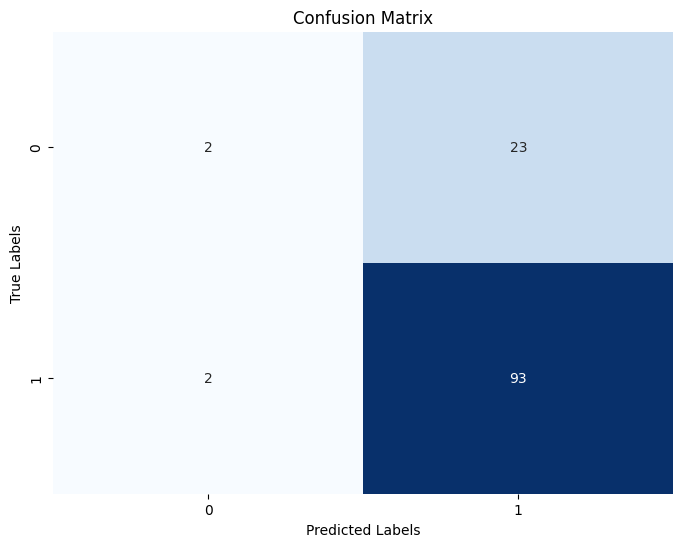

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
abnormal_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv", header=None)
abnormal_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv", header=None)

# Extract labels from the second column
y_train = abnormal_train_labels.iloc[:, 1].values
y_test = abnormal_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoost classifier
ada_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the AdaBoost classifier
ada_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = ada_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.5416666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.91      0.69        68
           1       0.33      0.06      0.10        52

    accuracy                           0.54       120
   macro avg       0.45      0.48      0.40       120
weighted avg       0.46      0.54      0.44       120



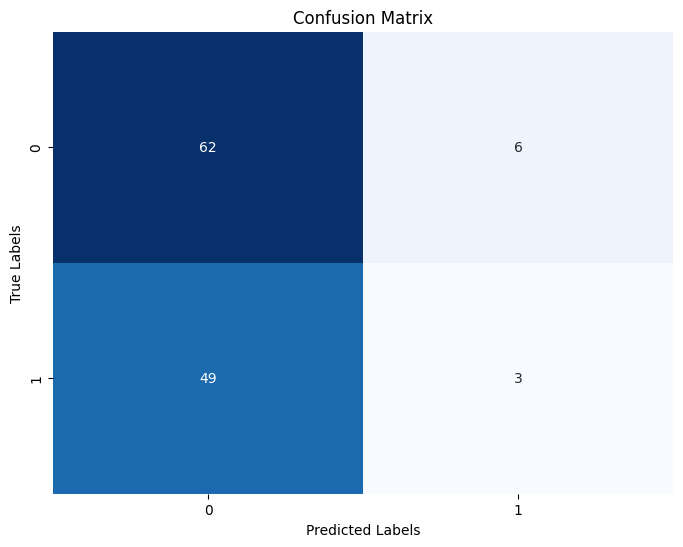

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
meniscus_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv", header=None)
meniscus_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv", header=None)

# Extract labels from the second column
y_train = meniscus_train_labels.iloc[:, 1].values
y_test = meniscus_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoost classifier
ada_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the AdaBoost classifier
ada_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = ada_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        66
           1       0.00      0.00      0.00        54

    accuracy                           0.55       120
   macro avg       0.28      0.50      0.35       120
weighted avg       0.30      0.55      0.39       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


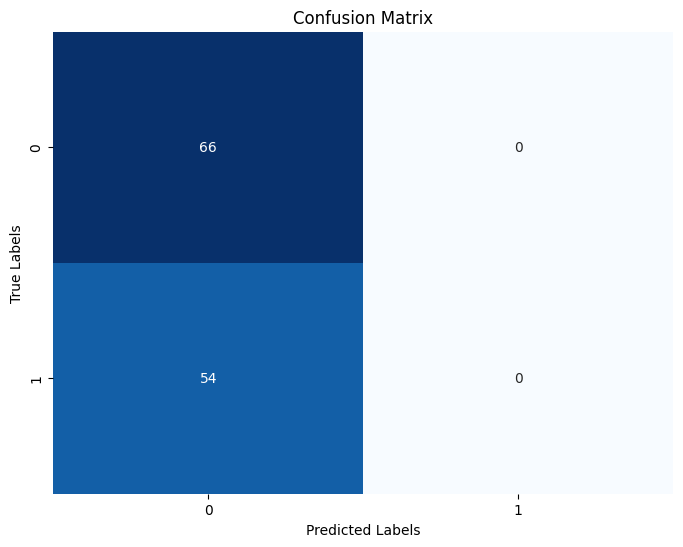

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
acl_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv", header=None)
acl_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv", header=None)

# Extract labels from the second column
y_train = acl_train_labels.iloc[:, 1].values
y_test = acl_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.7916666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


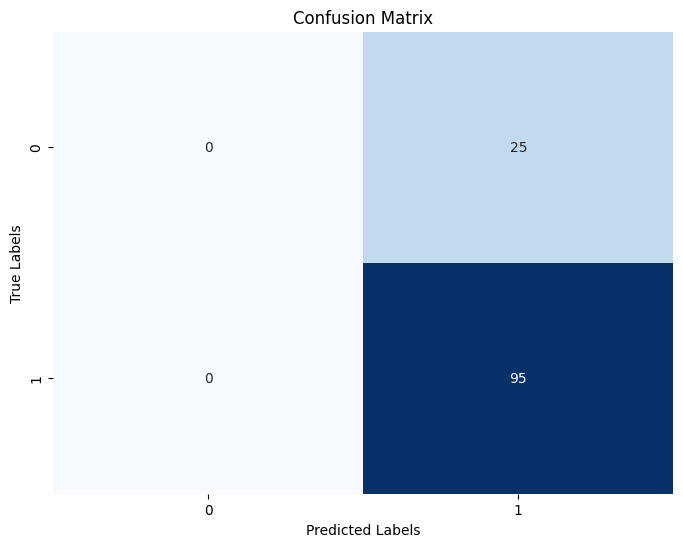

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
abnormal_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv", header=None)
abnormal_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv", header=None)

# Extract labels from the second column
y_train = abnormal_train_labels.iloc[:, 1].values
y_test = abnormal_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.5166666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.87      0.67        68
           1       0.25      0.06      0.09        52

    accuracy                           0.52       120
   macro avg       0.40      0.46      0.38       120
weighted avg       0.42      0.52      0.42       120



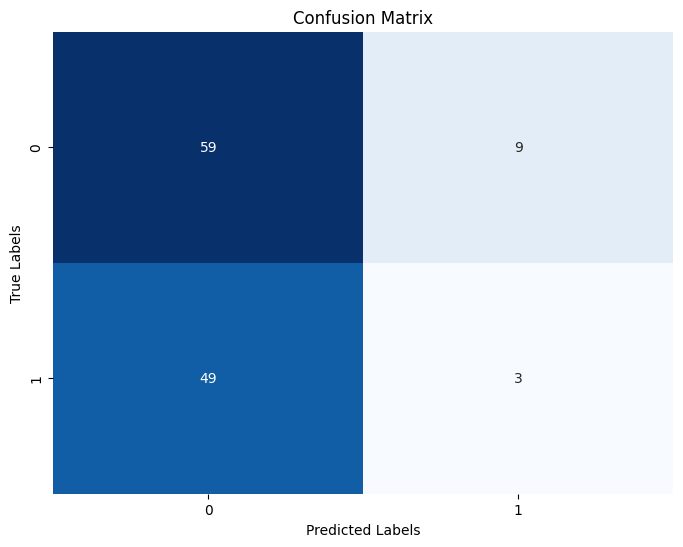

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
meniscus_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv", header=None)
meniscus_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv", header=None)

# Extract labels from the second column
y_train = meniscus_train_labels.iloc[:, 1].values
y_test = meniscus_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        66
           1       0.00      0.00      0.00        54

    accuracy                           0.55       120
   macro avg       0.28      0.50      0.35       120
weighted avg       0.30      0.55      0.39       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


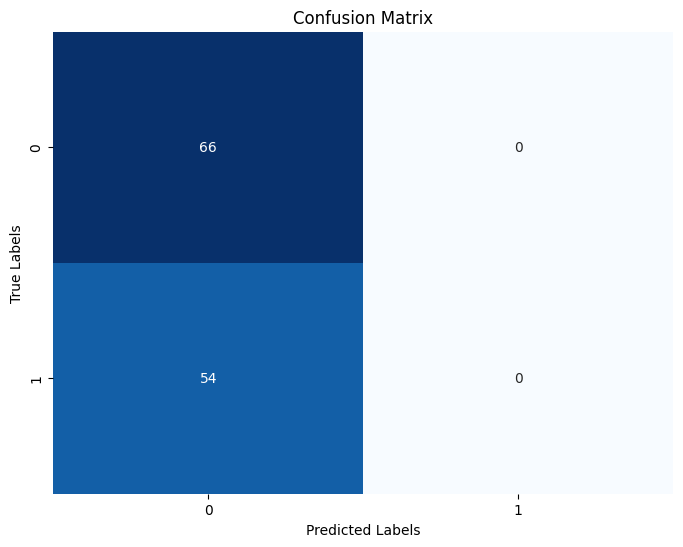

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
acl_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv", header=None)
acl_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv", header=None)

# Extract labels from the second column
y_train = acl_train_labels.iloc[:, 1].values
y_test = acl_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the SVM classifier with linear kernel
svm_clf = SVC(kernel='linear', probability=True, random_state=42)

# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.7916666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


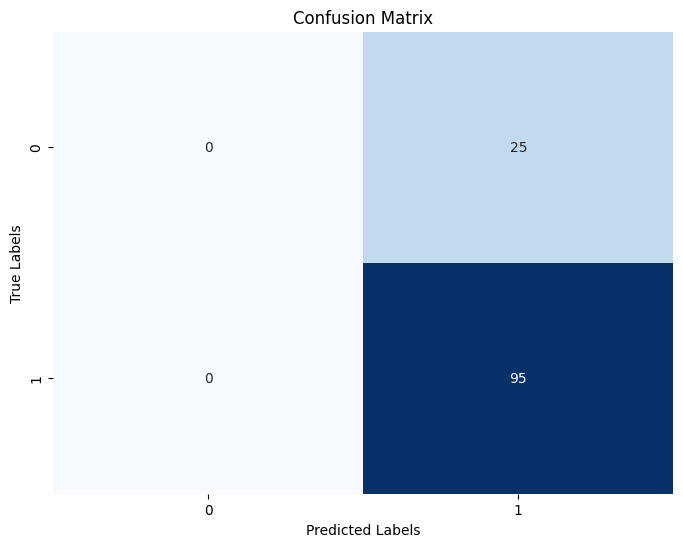

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
abnormal_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv", header=None)
abnormal_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv", header=None)

# Extract labels from the second column
y_train = abnormal_train_labels.iloc[:, 1].values
y_test = abnormal_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the SVM classifier with linear kernel
svm_clf = SVC(kernel='linear', probability=True, random_state=42)

# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.575
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.97      0.72        68
           1       0.60      0.06      0.11        52

    accuracy                           0.57       120
   macro avg       0.59      0.51      0.41       120
weighted avg       0.59      0.57      0.45       120



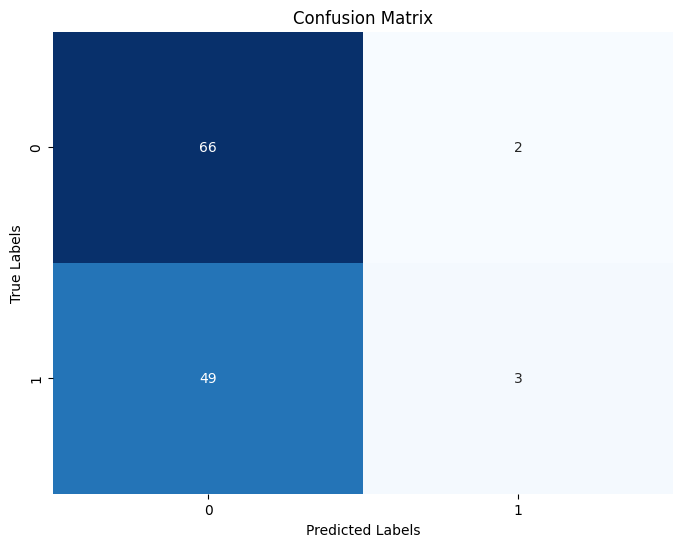

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
meniscus_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv", header=None)
meniscus_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv", header=None)

# Extract labels from the second column
y_train = meniscus_train_labels.iloc[:, 1].values
y_test = meniscus_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the SVM classifier with linear kernel
svm_clf = SVC(kernel='linear', probability=True, random_state=42)

# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        66
           1       0.00      0.00      0.00        54

    accuracy                           0.55       120
   macro avg       0.28      0.50      0.35       120
weighted avg       0.30      0.55      0.39       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


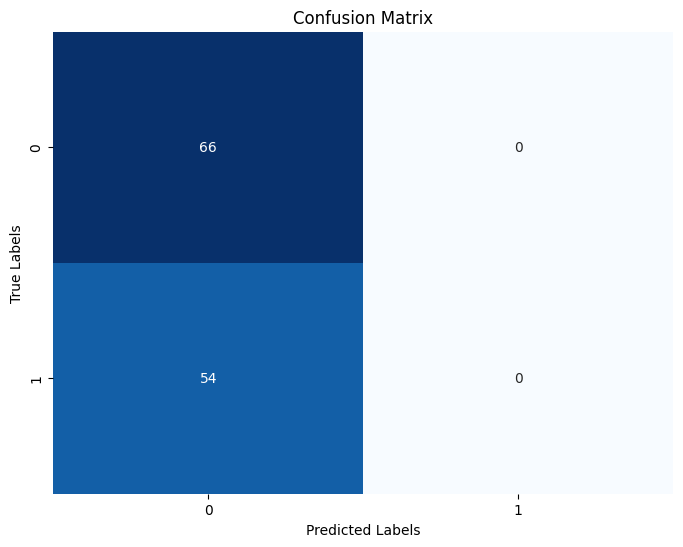

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
acl_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv", header=None)
acl_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv", header=None)

# Extract labels from the second column
y_train = acl_train_labels.iloc[:, 1].values
y_test = acl_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=5)

# Initialize the Bagging classifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the Bagging classifier
bagging_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7916666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


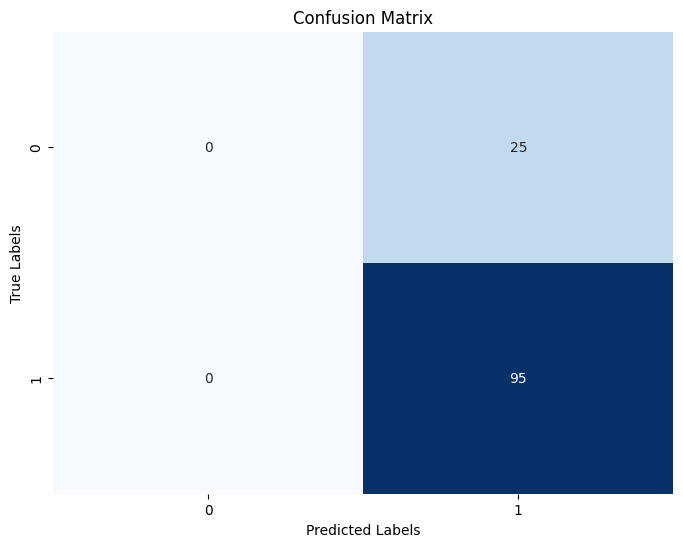

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
abnormal_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv", header=None)
abnormal_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv", header=None)

# Extract labels from the second column
y_train = abnormal_train_labels.iloc[:, 1].values
y_test = abnormal_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=5)

# Initialize the Bagging classifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the Bagging classifier
bagging_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.97      0.71        68
           1       0.00      0.00      0.00        52

    accuracy                           0.55       120
   macro avg       0.28      0.49      0.35       120
weighted avg       0.32      0.55      0.40       120



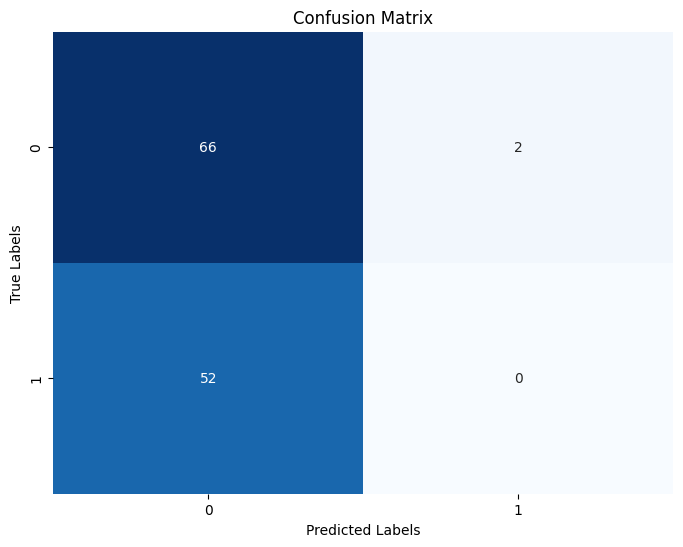

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
meniscus_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv", header=None)
meniscus_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv", header=None)

# Extract labels from the second column
y_train = meniscus_train_labels.iloc[:, 1].values
y_test = meniscus_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=5)

# Initialize the Bagging classifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the Bagging classifier
bagging_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        66
           1       0.00      0.00      0.00        54

    accuracy                           0.55       120
   macro avg       0.28      0.50      0.35       120
weighted avg       0.30      0.55      0.39       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


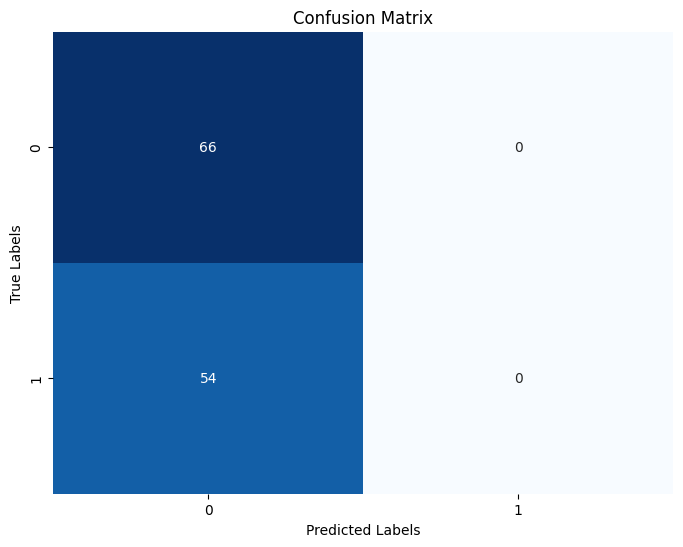

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
acl_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv", header=None)
acl_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv", header=None)

# Extract labels from the second column
y_train = acl_train_labels.iloc[:, 1].values
y_test = acl_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the base estimators
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('svc', SVC(kernel='linear', probability=True))
]

# Initialize the final estimator
final_estimator = LogisticRegression()

# Initialize the Stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)

# Train the Stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = stacking_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


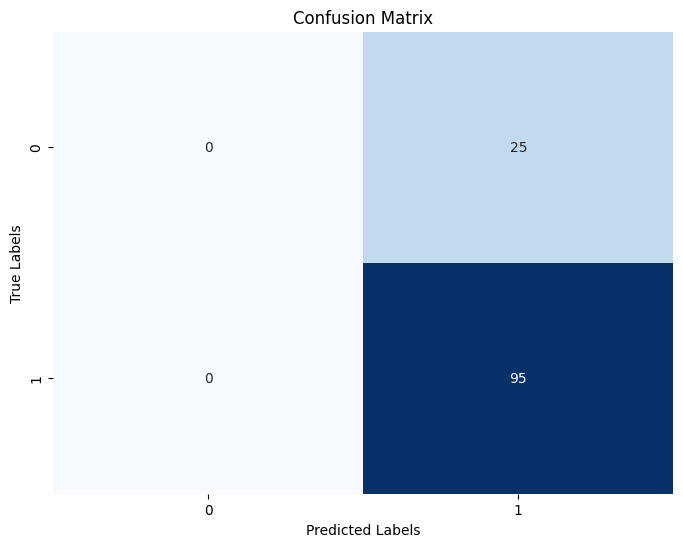

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
abnormal_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv", header=None)
abnormal_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv", header=None)

# Extract labels from the second column
y_train = abnormal_train_labels.iloc[:, 1].values
y_test = abnormal_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the base estimators
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('svc', SVC(kernel='linear', probability=True))
]

# Initialize the final estimator
final_estimator = LogisticRegression()

# Initialize the Stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)

# Train the Stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = stacking_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        68
           1       0.00      0.00      0.00        52

    accuracy                           0.57       120
   macro avg       0.28      0.50      0.36       120
weighted avg       0.32      0.57      0.41       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


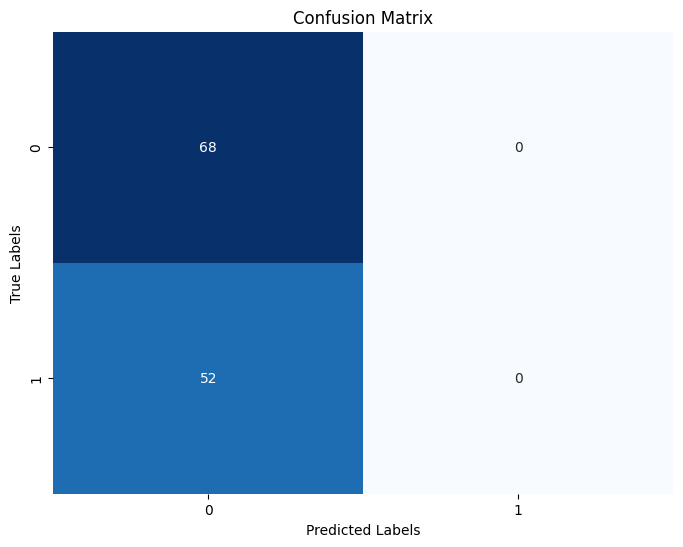

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
meniscus_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv", header=None)
meniscus_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv", header=None)

# Extract labels from the second column
y_train = meniscus_train_labels.iloc[:, 1].values
y_test = meniscus_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the base estimators
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('svc', SVC(kernel='linear', probability=True))
]

# Initialize the final estimator
final_estimator = LogisticRegression()

# Initialize the Stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)

# Train the Stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = stacking_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import os
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops

def extract_textural_features_from_all_images(directory_path, save_path):
    all_features = []
    for filename in os.listdir(directory_path):
        if filename.endswith('.npy'):
            image_path = os.path.join(directory_path, filename)
            features = extract_textural_features_from_npy(image_path)
            features['image'] = filename[:-4]
            all_features.append(features)
    features_df = pd.DataFrame(all_features)
    features_df.to_csv(save_path, index=False)
    return features_df

def extract_textural_features_from_npy(image_path):
    image_array = np.load(image_path)
    features_list = []

    for slice_index in range(image_array.shape[2]):
        slice_array = image_array[:, :, slice_index]
        slice_array = (slice_array * 255).astype(np.uint8)  # Normalize the slice to 8-bit
        glcm = graycomatrix(slice_array, distances=[1], angles=[0], symmetric=True, normed=True)

        contrast = graycoprops(glcm, 'contrast')[0, 0]
        dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]

        features_list.append({
            'contrast': contrast,
            'dissimilarity': dissimilarity,
            'homogeneity': homogeneity,
            'energy': energy,
            'correlation': correlation
        })

    # Aggregate features across all slices (e.g., take the mean)
    aggregated_features = {
        'contrast': np.mean([f['contrast'] for f in features_list]),
        'dissimilarity': np.mean([f['dissimilarity'] for f in features_list]),
        'homogeneity': np.mean([f['homogeneity'] for f in features_list]),
        'energy': np.mean([f['energy'] for f in features_list]),
        'correlation': np.mean([f['correlation'] for f in features_list])
    }

    return aggregated_features

def load_features_from_csv(file_path):
    return pd.read_csv(file_path)

# Paths for saving the features
train_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/'
valid_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/'

axial_train_save_path = os.path.join(train_dir, 'axial_textural_features.csv')
coronal_train_save_path = os.path.join(train_dir, 'coronal_textural_features.csv')
sagittal_train_save_path = os.path.join(train_dir, 'sagittal_textural_features.csv')

axial_valid_save_path = os.path.join(valid_dir, 'axial_textural_test_features.csv')
coronal_valid_save_path = os.path.join(valid_dir, 'coronal_textural_test_features.csv')
sagittal_valid_save_path = os.path.join(valid_dir, 'sagittal_textural_test_features.csv')

# Extract and save features for training data
axial_features_df = extract_textural_features_from_all_images(train_dir + 'axial/', axial_train_save_path)
coronal_features_df = extract_textural_features_from_all_images(train_dir + 'coronal/', coronal_train_save_path)
sagittal_features_df = extract_textural_features_from_all_images(train_dir + 'sagittal/', sagittal_train_save_path)

# Extract and save features for validation data
axial_test_features_df = extract_textural_features_from_all_images(valid_dir + 'axial/', axial_valid_save_path)
coronal_test_features_df = extract_textural_features_from_all_images(valid_dir + 'coronal/', coronal_valid_save_path)
sagittal_test_features_df = extract_textural_features_from_all_images(valid_dir + 'sagittal/', sagittal_valid_save_path)

# Load features from CSV files
axial_features_df = load_features_from_csv(axial_train_save_path)
coronal_features_df = load_features_from_csv(coronal_train_save_path)
sagittal_features_df = load_features_from_csv(sagittal_train_save_path)

axial_test_features_df = load_features_from_csv(axial_valid_save_path)
coronal_test_features_df = load_features_from_csv(coronal_valid_save_path)
sagittal_test_features_df = load_features_from_csv(sagittal_valid_save_path)

print(axial_features_df)
print(coronal_features_df)
print(sagittal_features_df)

print(axial_test_features_df)
print(coronal_test_features_df)
print(sagittal_test_features_df)


        contrast  dissimilarity  homogeneity    energy  correlation  image
0     674.709341      12.123750     0.199503  0.058855     0.886176    135
1     516.615372       8.656475     0.281091  0.121578     0.942464    123
2     948.265596      15.548206     0.104576  0.031056     0.816050    128
3     992.614740      14.209319     0.158157  0.071773     0.857630    120
4     687.004678      13.734470     0.156596  0.056349     0.890112    121
...          ...            ...          ...       ...          ...    ...
1125  571.222987       9.714218     0.252892  0.078839     0.849426    132
1126  520.424880      10.006827     0.225976  0.069834     0.924704    126
1127  454.143185       8.509892     0.231631  0.083855     0.916677    118
1128  491.317618       8.912044     0.207465  0.079428     0.895765    134
1129  554.804143      10.639891     0.230771  0.076416     0.921822    116

[1130 rows x 6 columns]
         contrast  dissimilarity  homogeneity    energy  correlation  image

Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.95      0.69        66
           1       0.00      0.00      0.00        54

    accuracy                           0.53       120
   macro avg       0.27      0.48      0.34       120
weighted avg       0.30      0.53      0.38       120



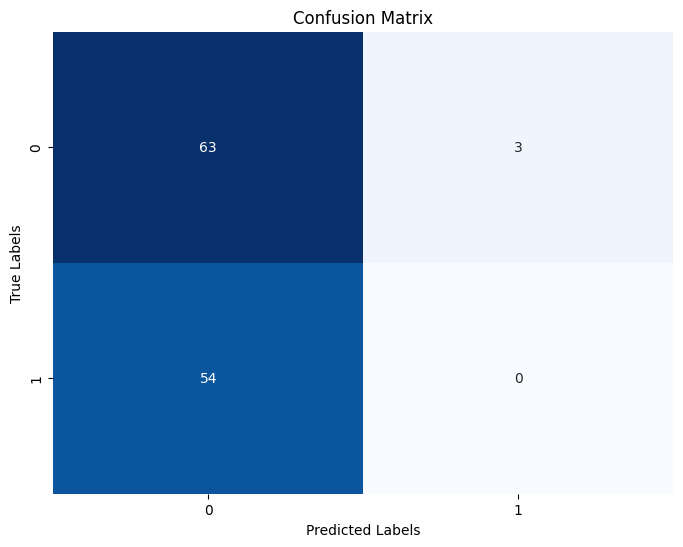

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
acl_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv", header=None)
acl_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv", header=None)

# Extract labels from the second column
y_train = acl_train_labels.iloc[:, 1].values
y_test = acl_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize and train the AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = adaboost_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.04      0.07        25
           1       0.79      0.97      0.87        95

    accuracy                           0.78       120
   macro avg       0.52      0.50      0.47       120
weighted avg       0.68      0.78      0.70       120



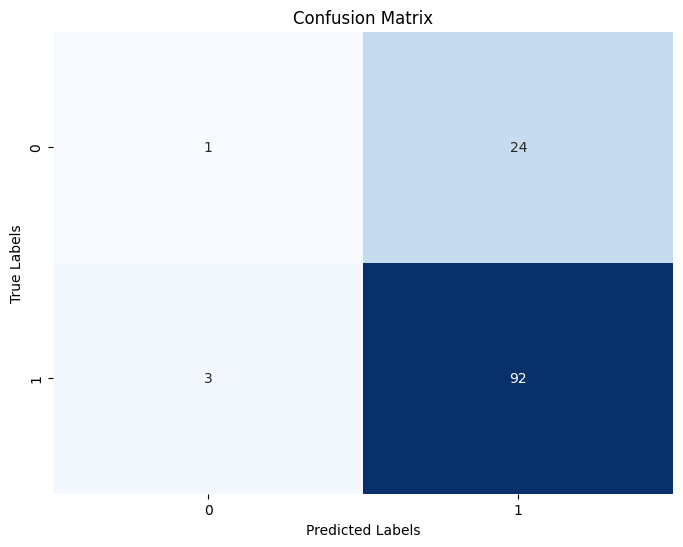

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
abnormal_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv", header=None)
abnormal_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv", header=None)

# Extract labels from the second column
y_train = abnormal_train_labels.iloc[:, 1].values
y_test = abnormal_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize and train the AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = adaboost_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.79      0.65        68
           1       0.33      0.13      0.19        52

    accuracy                           0.51       120
   macro avg       0.44      0.46      0.42       120
weighted avg       0.45      0.51      0.45       120



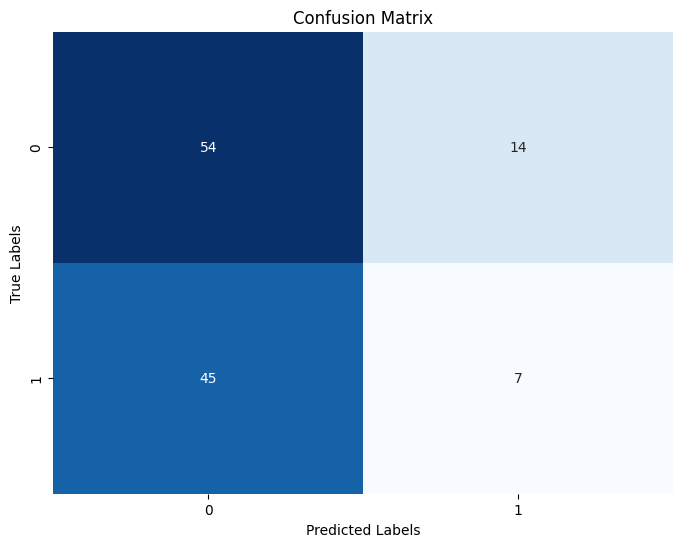

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
meniscus_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv", header=None)
meniscus_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv", header=None)

# Extract labels from the second column
y_train = meniscus_train_labels.iloc[:, 1].values
y_test = meniscus_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize and train the AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = adaboost_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        66
           1       0.00      0.00      0.00        54

    accuracy                           0.55       120
   macro avg       0.28      0.50      0.35       120
weighted avg       0.30      0.55      0.39       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


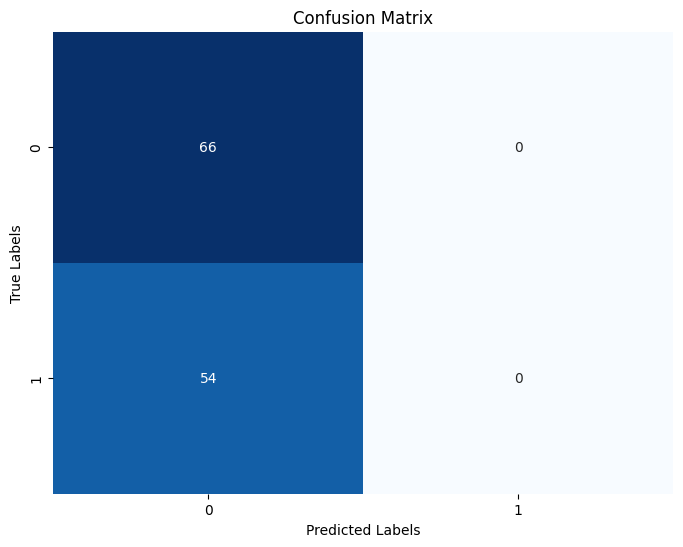

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
acl_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv", header=None)
acl_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv", header=None)

# Extract labels from the second column
y_train = acl_train_labels.iloc[:, 1].values
y_test = acl_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.04      0.07        25
           1       0.80      0.99      0.88        95

    accuracy                           0.79       120
   macro avg       0.65      0.51      0.48       120
weighted avg       0.73      0.79      0.71       120



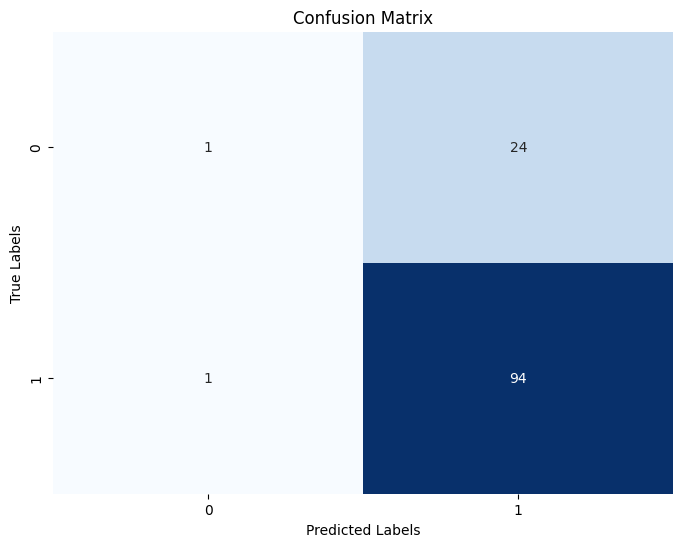

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
abnormal_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv", header=None)
abnormal_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv", header=None)

# Extract labels from the second column
y_train = abnormal_train_labels.iloc[:, 1].values
y_test = abnormal_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.93      0.70        68
           1       0.38      0.06      0.10        52

    accuracy                           0.55       120
   macro avg       0.47      0.49      0.40       120
weighted avg       0.48      0.55      0.44       120



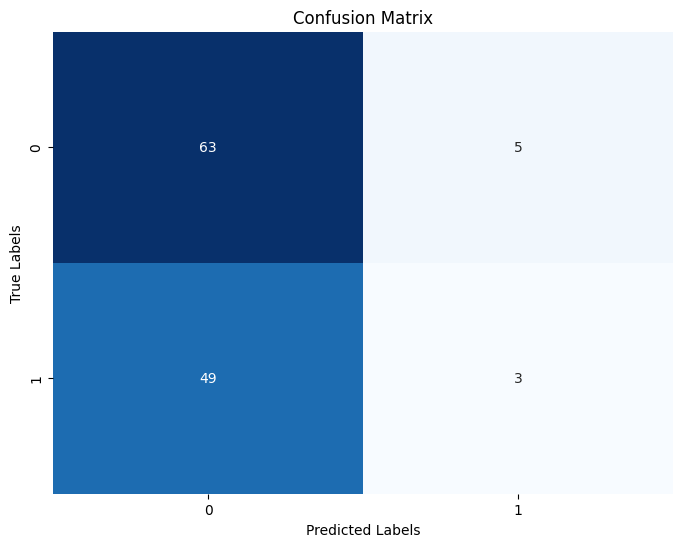

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
meniscus_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv", header=None)
meniscus_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv", header=None)

# Extract labels from the second column
y_train = meniscus_train_labels.iloc[:, 1].values
y_test = meniscus_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        66
           1       0.00      0.00      0.00        54

    accuracy                           0.55       120
   macro avg       0.28      0.50      0.35       120
weighted avg       0.30      0.55      0.39       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


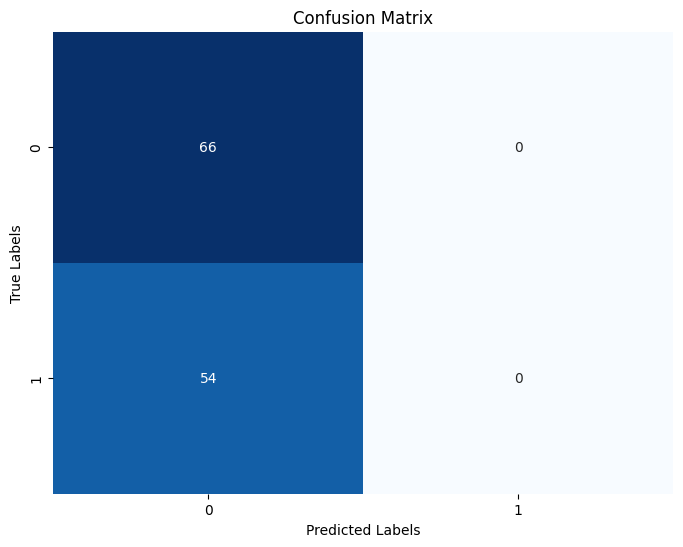

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
acl_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv", header=None)
acl_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv", header=None)

# Extract labels from the second column
y_train = acl_train_labels.iloc[:, 1].values
y_test = acl_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize and train the SVM classifier with a linear kernel
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


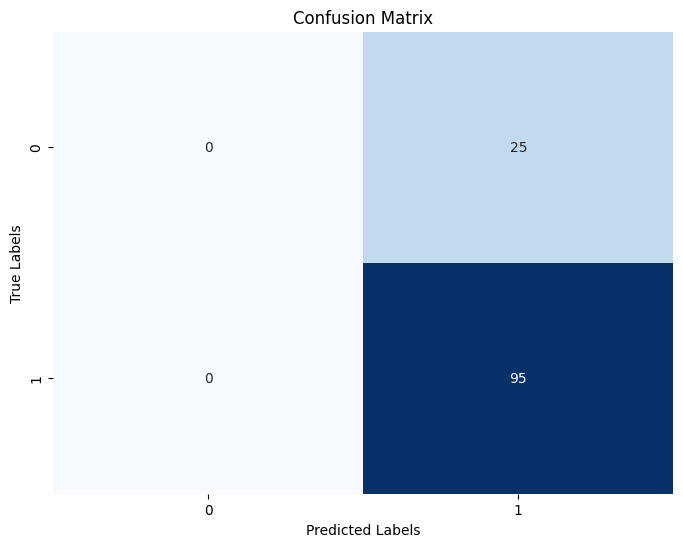

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
abnormal_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv", header=None)
abnormal_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv", header=None)

# Extract labels from the second column
y_train = abnormal_train_labels.iloc[:, 1].values
y_test = abnormal_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize and train the SVM classifier with a linear kernel
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        68
           1       0.00      0.00      0.00        52

    accuracy                           0.57       120
   macro avg       0.28      0.50      0.36       120
weighted avg       0.32      0.57      0.41       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


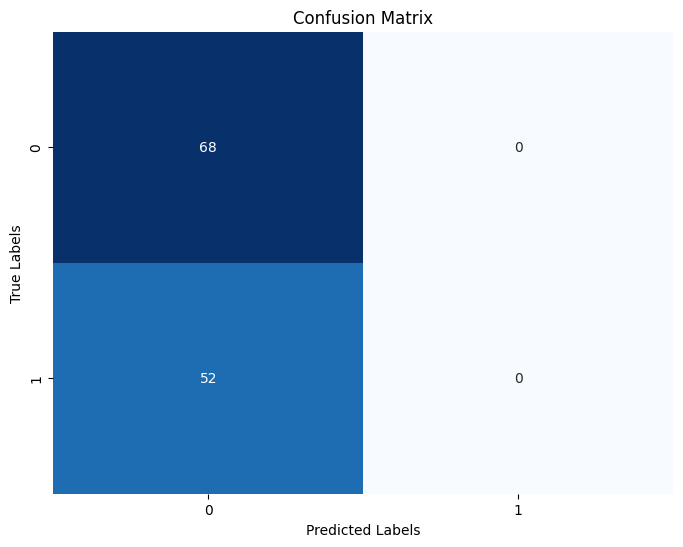

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
meniscus_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv", header=None)
meniscus_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv", header=None)

# Extract labels from the second column
y_train = meniscus_train_labels.iloc[:, 1].values
y_test = meniscus_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize and train the SVM classifier with a linear kernel
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        66
           1       1.00      0.02      0.04        54

    accuracy                           0.56       120
   macro avg       0.78      0.51      0.37       120
weighted avg       0.76      0.56      0.41       120



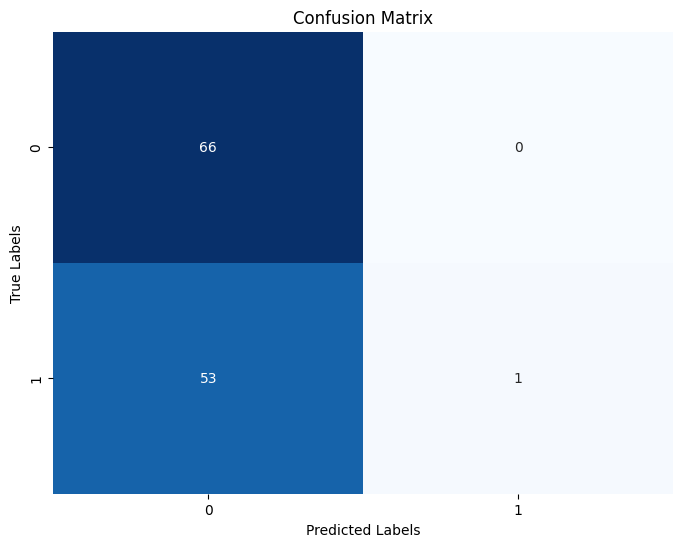

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
acl_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv", header=None)
acl_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv", header=None)

# Extract labels from the second column
y_train = acl_train_labels.iloc[:, 1].values
y_test = acl_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize and train the Bagging classifier
base_estimator = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      0.98      0.87        95

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.62      0.78      0.69       120



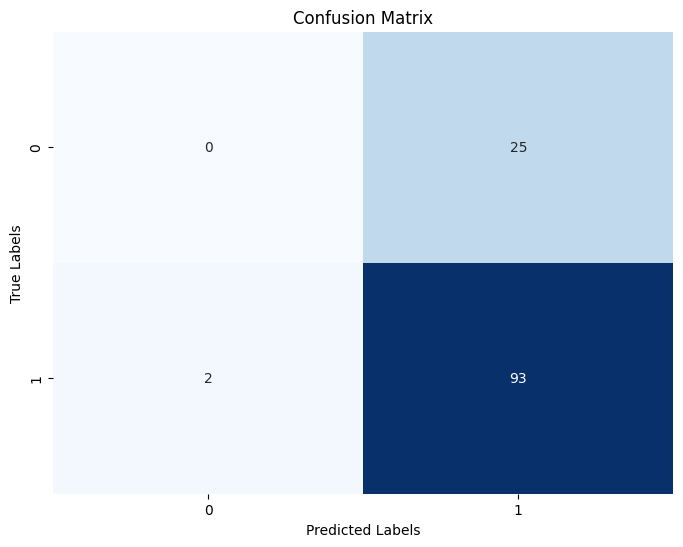

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
abnormal_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv", header=None)
abnormal_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv", header=None)

# Extract labels from the second column
y_train = abnormal_train_labels.iloc[:, 1].values
y_test = abnormal_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize and train the Bagging classifier
base_estimator = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.93      0.70        68
           1       0.38      0.06      0.10        52

    accuracy                           0.55       120
   macro avg       0.47      0.49      0.40       120
weighted avg       0.48      0.55      0.44       120



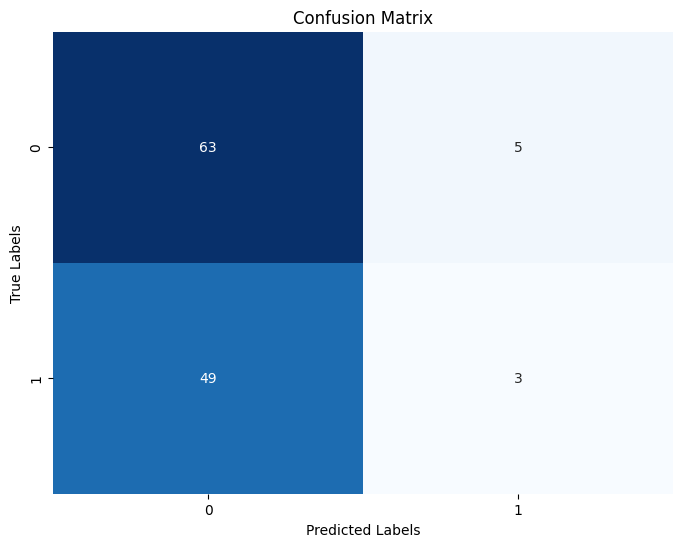

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
meniscus_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv", header=None)
meniscus_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv", header=None)

# Extract labels from the second column
y_train = meniscus_train_labels.iloc[:, 1].values
y_test = meniscus_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize and train the Bagging classifier
base_estimator = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = bagging_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        66
           1       0.00      0.00      0.00        54

    accuracy                           0.55       120
   macro avg       0.28      0.50      0.35       120
weighted avg       0.30      0.55      0.39       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


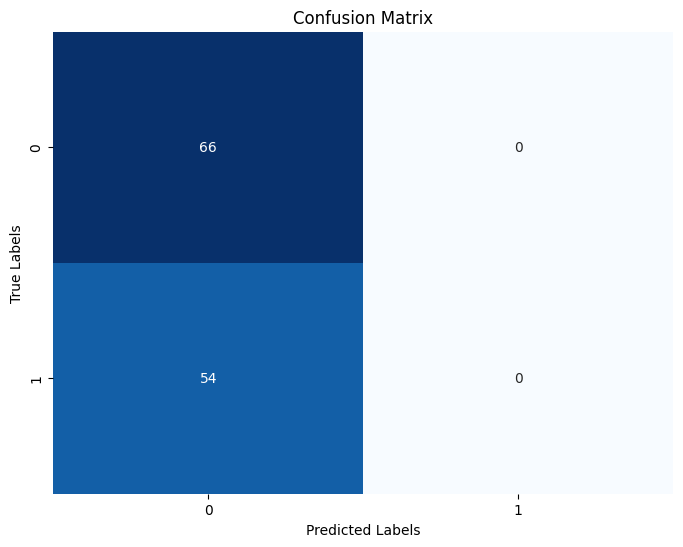

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
acl_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv", header=None)
acl_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv", header=None)

# Extract labels from the second column
y_train = acl_train_labels.iloc[:, 1].values
y_test = acl_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the base estimators
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('svc', SVC(kernel='linear', probability=True))
]

# Initialize the final estimator
final_estimator = LogisticRegression()

# Initialize the Stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)

# Train the Stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = stacking_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


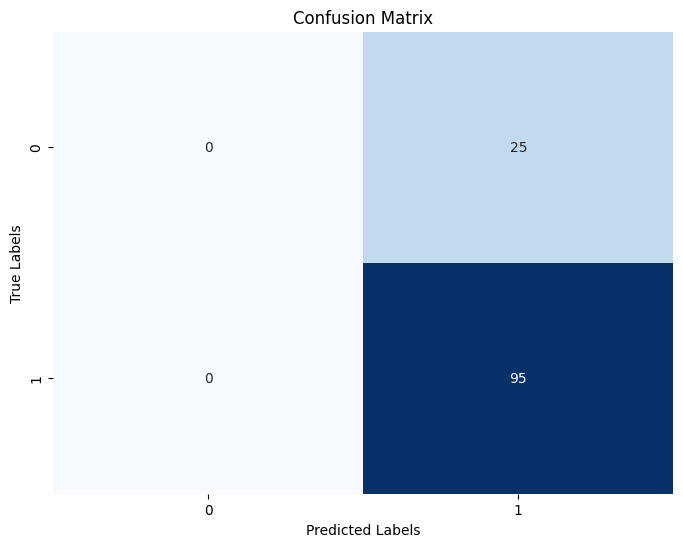

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
abnormal_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv", header=None)
abnormal_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv", header=None)

# Extract labels from the second column
y_train = abnormal_train_labels.iloc[:, 1].values
y_test = abnormal_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the base estimators
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('svc', SVC(kernel='linear', probability=True))
]

# Initialize the final estimator
final_estimator = LogisticRegression()

# Initialize the Stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)

# Train the Stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = stacking_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        68
           1       0.00      0.00      0.00        52

    accuracy                           0.57       120
   macro avg       0.28      0.50      0.36       120
weighted avg       0.32      0.57      0.41       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


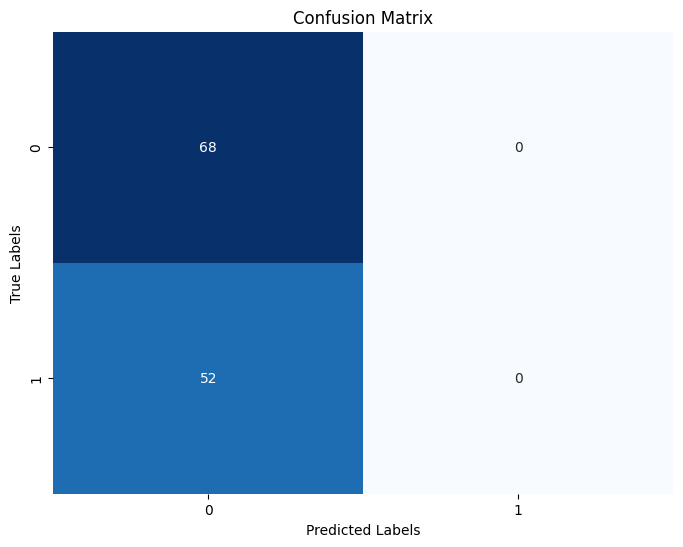

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Features from CSV Files
axial_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_test_features_df = pd.read_csv('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

# Convert DataFrames to NumPy arrays
axial_features_np = axial_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_features_np = coronal_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_features_np = sagittal_features_df.drop(columns=['image'], errors='ignore').to_numpy()

axial_test_features_np = axial_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
coronal_test_features_np = coronal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()
sagittal_test_features_np = sagittal_test_features_df.drop(columns=['image'], errors='ignore').to_numpy()

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Load ACL labels
meniscus_train_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv", header=None)
meniscus_test_labels = pd.read_csv("/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv", header=None)

# Extract labels from the second column
y_train = meniscus_train_labels.iloc[:, 1].values
y_test = meniscus_test_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the base estimators
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('svc', SVC(kernel='linear', probability=True))
]

# Initialize the final estimator
final_estimator = LogisticRegression()

# Initialize the Stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)

# Train the Stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = stacking_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import os
import numpy as np
import pandas as pd
from skimage.feature import hog
from skimage import exposure

def extract_hog_features_from_all_images(directory_path, save_path, fixed_length=385):
    all_features = []
    for filename in os.listdir(directory_path):
        if filename.endswith('.npy'):
            image_path = os.path.join(directory_path, filename)
            features = extract_hog_features_from_npy(image_path, fixed_length)
            features['image'] = filename[:-4]
            all_features.append(features)
    features_df = pd.DataFrame(all_features)
    features_df.to_csv(save_path, index=False)
    return features_df

def extract_hog_features_from_npy(image_path, fixed_length):
    image_array = np.load(image_path)
    features_list = []

    for slice_index in range(image_array.shape[2]):
        slice_array = image_array[:, :, slice_index]
        fd, hog_image = hog(slice_array, orientations=8, pixels_per_cell=(16, 16),
                            cells_per_block=(1, 1), visualize=True)

        if len(fd) < fixed_length:
            fd = np.pad(fd, (0, fixed_length - len(fd)), 'constant')
        else:
            fd = fd[:fixed_length]

        features_list.append(fd)

    mean_hog_descriptor = np.mean(features_list, axis=0)
    print(f"Image: {image_path}, Mean HOG Descriptor Length: {len(mean_hog_descriptor)}")  # Debug statement
    return {'hog_descriptor': mean_hog_descriptor.tolist()}

def load_features_from_csv(file_path):
    return pd.read_csv(file_path)

# Paths for saving the features
train_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/'
valid_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/'

axial_train_save_path = os.path.join(train_dir, 'axial_hog_features.csv')
coronal_train_save_path = os.path.join(train_dir, 'coronal_hog_features.csv')
sagittal_train_save_path = os.path.join(train_dir, 'sagittal_hog_features.csv')

axial_valid_save_path = os.path.join(valid_dir, 'axial_hog_test_features.csv')
coronal_valid_save_path = os.path.join(valid_dir, 'coronal_hog_test_features.csv')
sagittal_valid_save_path = os.path.join(valid_dir, 'sagittal_hog_test_features.csv')

# Extract and save features for training data
axial_features_df = extract_hog_features_from_all_images(train_dir + 'axial/', axial_train_save_path)
coronal_features_df = extract_hog_features_from_all_images(train_dir + 'coronal/', coronal_train_save_path)
sagittal_features_df = extract_hog_features_from_all_images(train_dir + 'sagittal/', sagittal_train_save_path)

# Extract and save features for validation data
axial_test_features_df = extract_hog_features_from_all_images(valid_dir + 'axial/', axial_valid_save_path)
coronal_test_features_df = extract_hog_features_from_all_images(valid_dir + 'coronal/', coronal_valid_save_path)
sagittal_test_features_df = extract_hog_features_from_all_images(valid_dir + 'sagittal/', sagittal_valid_save_path)

# Load features from CSV files
axial_features_df = load_features_from_csv(axial_train_save_path)
coronal_features_df = load_features_from_csv(coronal_train_save_path)
sagittal_features_df = load_features_from_csv(sagittal_train_save_path)

axial_test_features_df = load_features_from_csv(axial_valid_save_path)
coronal_test_features_df = load_features_from_csv(coronal_valid_save_path)
sagittal_test_features_df = load_features_from_csv(sagittal_valid_save_path)

print(axial_features_df)
print(coronal_features_df)
print(sagittal_features_df)

print(axial_test_features_df)
print(coronal_test_features_df)
print(sagittal_test_features_df)


Image: /content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial/0135.npy, Mean HOG Descriptor Length: 385
Image: /content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial/0123.npy, Mean HOG Descriptor Length: 385
Image: /content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial/0128.npy, Mean HOG Descriptor Length: 385
Image: /content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial/0120.npy, Mean HOG Descriptor Length: 385
Image: /content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial/0121.npy, Mean HOG Descriptor Length: 385
Image: /content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial/0133.npy, Mean HOG Descriptor Length: 385
Image: /content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial/0129.npy, Mean HOG Descriptor Length: 385
Image: /content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial/0142.npy, Mean HOG Descriptor Length: 385
Image: /content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial/0147.npy, Mean HOG Descriptor Length: 385
Image: /content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial/01

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2

def extract_sift_features_from_all_images(directory_path, save_path):
    all_features = []
    for filename in os.listdir(directory_path):
        if filename.endswith('.npy'):
            image_path = os.path.join(directory_path, filename)
            features = extract_sift_features_from_npy(image_path)
            features['image'] = filename[:-4]
            all_features.append(features)
    features_df = pd.DataFrame(all_features)
    features_df.to_csv(save_path, index=False)
    return features_df

def extract_sift_features_from_npy(image_path):
    image_array = np.load(image_path)
    features_list = []

    for slice_index in range(image_array.shape[2]):
        slice_array = image_array[:, :, slice_index]
        slice_array = (slice_array * 255).astype(np.uint8)  # Normalize the slice to 8-bit

        # Initialize SIFT detector
        sift = cv2.SIFT_create()

        # Find keypoints and descriptors
        keypoints, descriptors = sift.detectAndCompute(slice_array, None)

        # Store descriptors if found
        if descriptors is not None:
            features_list.append(descriptors)

    # Aggregate features across all slices
    if len(features_list) > 0:
        aggregated_descriptors = np.concatenate(features_list, axis=0)
        aggregated_descriptors_mean = np.mean(aggregated_descriptors, axis=0)
    else:
        aggregated_descriptors_mean = np.zeros((128,))  # Empty descriptor if no keypoints found

    return {'sift_descriptors': aggregated_descriptors_mean.tolist()}

def load_features_from_csv(file_path):
    return pd.read_csv(file_path)

# Paths for saving the features
train_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/'
valid_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/'

axial_train_save_path = os.path.join(train_dir, 'axial_sift_features.csv')
coronal_train_save_path = os.path.join(train_dir, 'coronal_sift_features.csv')
sagittal_train_save_path = os.path.join(train_dir, 'sagittal_sift_features.csv')

axial_valid_save_path = os.path.join(valid_dir, 'axial_sift_test_features.csv')
coronal_valid_save_path = os.path.join(valid_dir, 'coronal_sift_test_features.csv')
sagittal_valid_save_path = os.path.join(valid_dir, 'sagittal_sift_test_features.csv')

# Extract and save features for training data
axial_features_df = extract_sift_features_from_all_images(train_dir + 'axial/', axial_train_save_path)
coronal_features_df = extract_sift_features_from_all_images(train_dir + 'coronal/', coronal_train_save_path)
sagittal_features_df = extract_sift_features_from_all_images(train_dir + 'sagittal/', sagittal_train_save_path)

# Extract and save features for validation data
axial_test_features_df = extract_sift_features_from_all_images(valid_dir + 'axial/', axial_valid_save_path)
coronal_test_features_df = extract_sift_features_from_all_images(valid_dir + 'coronal/', coronal_valid_save_path)
sagittal_test_features_df = extract_sift_features_from_all_images(valid_dir + 'sagittal/', sagittal_valid_save_path)

# Load features from CSV files
axial_features_df = load_features_from_csv(axial_train_save_path)
coronal_features_df = load_features_from_csv(coronal_train_save_path)
sagittal_features_df = load_features_from_csv(sagittal_train_save_path)

axial_test_features_df = load_features_from_csv(axial_valid_save_path)
coronal_test_features_df = load_features_from_csv(coronal_valid_save_path)
sagittal_test_features_df = load_features_from_csv(sagittal_valid_save_path)

print(axial_features_df)
print(coronal_features_df)
print(sagittal_features_df)

print(axial_test_features_df)
print(coronal_test_features_df)
print(sagittal_test_features_df)


                                       sift_descriptors  image
0     [24.169221878051758, 19.31914520263672, 15.437...    135
1     [27.424596786499023, 18.87627601623535, 11.327...    123
2     [27.816001892089844, 18.520132064819336, 10.93...    128
3     [30.358922958374023, 17.082172393798828, 9.233...    120
4     [24.52269172668457, 21.74534034729004, 18.4799...    121
...                                                 ...    ...
1125  [24.529756546020508, 20.2990665435791, 17.7049...    132
1126  [25.912946701049805, 19.503753662109375, 13.44...    126
1127  [30.28477668762207, 18.76352310180664, 11.8468...    118
1128  [27.722806930541992, 13.759649276733398, 8.963...    134
1129  [23.96211814880371, 18.823362350463867, 14.745...    116

[1130 rows x 2 columns]
                                       sift_descriptors  image
0     [22.836320877075195, 7.8793840408325195, 3.288...    120
1     [37.08500671386719, 10.944314002990723, 3.6964...    152
2     [31.367399215698242, 8.6

X_train shape: (1130, 384)
X_test shape: (120, 384)
X_train dtype: float64
X_test dtype: float64
Accuracy: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.98      0.70        66
           1       0.00      0.00      0.00        54

    accuracy                           0.54       120
   macro avg       0.27      0.49      0.35       120
weighted avg       0.30      0.54      0.39       120



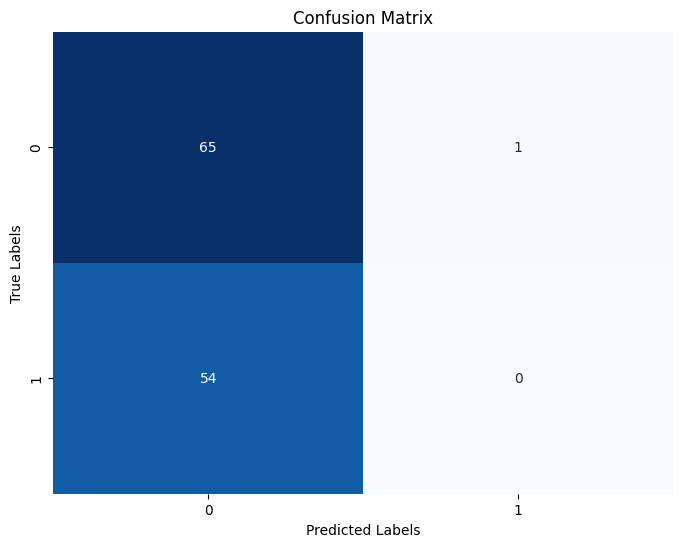

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define paths to the SIFT feature CSV files and the label files
axial_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv'
coronal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv'
sagittal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv'

axial_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv'
coronal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv'
sagittal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv'

train_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv'
valid_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv'

# Load Features from CSV Files
axial_features_df = pd.read_csv(axial_train_save_path)
coronal_features_df = pd.read_csv(coronal_train_save_path)
sagittal_features_df = pd.read_csv(sagittal_train_save_path)

axial_test_features_df = pd.read_csv(axial_valid_save_path)
coronal_test_features_df = pd.read_csv(coronal_valid_save_path)
sagittal_test_features_df = pd.read_csv(sagittal_valid_save_path)

# Convert string representations of lists into actual lists
axial_features_df['sift_descriptors'] = axial_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_features_df['sift_descriptors'] = coronal_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_features_df['sift_descriptors'] = sagittal_features_df['sift_descriptors'].apply(ast.literal_eval)

axial_test_features_df['sift_descriptors'] = axial_test_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_test_features_df['sift_descriptors'] = coronal_test_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_test_features_df['sift_descriptors'] = sagittal_test_features_df['sift_descriptors'].apply(ast.literal_eval)

# Convert DataFrames to NumPy arrays
axial_features_np = np.array(axial_features_df['sift_descriptors'].tolist())
coronal_features_np = np.array(coronal_features_df['sift_descriptors'].tolist())
sagittal_features_np = np.array(sagittal_features_df['sift_descriptors'].tolist())

axial_test_features_np = np.array(axial_test_features_df['sift_descriptors'].tolist())
coronal_test_features_np = np.array(coronal_test_features_df['sift_descriptors'].tolist())
sagittal_test_features_np = np.array(sagittal_test_features_df['sift_descriptors'].tolist())

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Debug prints to check the data shapes and types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

# Load ACL labels
train_labels = pd.read_csv(train_labels_path, header=None)
valid_labels = pd.read_csv(valid_labels_path, header=None)

# Extract labels from the second column
y_train = train_labels.iloc[:, 1].values
y_test = valid_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the AdaBoost classifier
adaboost_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)

# Train the AdaBoost classifier
adaboost_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = adaboost_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


X_train shape: (1130, 384)
X_test shape: (120, 384)
X_train dtype: float64
X_test dtype: float64
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.08      0.13        25
           1       0.80      0.96      0.87        95

    accuracy                           0.78       120
   macro avg       0.57      0.52      0.50       120
weighted avg       0.70      0.78      0.72       120



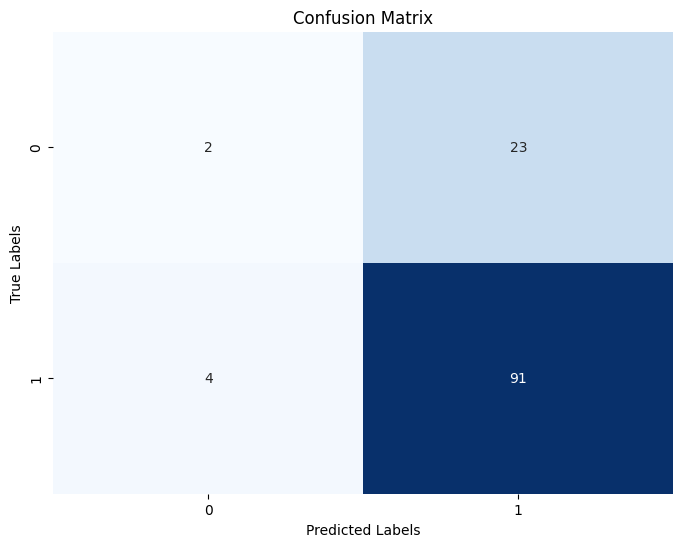

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define paths to the SIFT feature CSV files and the label files
axial_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv'
coronal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv'
sagittal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv'

axial_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv'
coronal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv'
sagittal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv'

train_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv'
valid_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv'

# Load Features from CSV Files
axial_features_df = pd.read_csv(axial_train_save_path)
coronal_features_df = pd.read_csv(coronal_train_save_path)
sagittal_features_df = pd.read_csv(sagittal_train_save_path)

axial_test_features_df = pd.read_csv(axial_valid_save_path)
coronal_test_features_df = pd.read_csv(coronal_valid_save_path)
sagittal_test_features_df = pd.read_csv(sagittal_valid_save_path)

# Convert string representations of lists into actual lists
axial_features_df['sift_descriptors'] = axial_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_features_df['sift_descriptors'] = coronal_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_features_df['sift_descriptors'] = sagittal_features_df['sift_descriptors'].apply(ast.literal_eval)

axial_test_features_df['sift_descriptors'] = axial_test_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_test_features_df['sift_descriptors'] = coronal_test_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_test_features_df['sift_descriptors'] = sagittal_test_features_df['sift_descriptors'].apply(ast.literal_eval)

# Convert DataFrames to NumPy arrays
axial_features_np = np.array(axial_features_df['sift_descriptors'].tolist())
coronal_features_np = np.array(coronal_features_df['sift_descriptors'].tolist())
sagittal_features_np = np.array(sagittal_features_df['sift_descriptors'].tolist())

axial_test_features_np = np.array(axial_test_features_df['sift_descriptors'].tolist())
coronal_test_features_np = np.array(coronal_test_features_df['sift_descriptors'].tolist())
sagittal_test_features_np = np.array(sagittal_test_features_df['sift_descriptors'].tolist())

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Debug prints to check the data shapes and types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

# Load ACL labels
train_labels = pd.read_csv(train_labels_path, header=None)
valid_labels = pd.read_csv(valid_labels_path, header=None)

# Extract labels from the second column
y_train = train_labels.iloc[:, 1].values
y_test = valid_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the AdaBoost classifier
adaboost_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)

# Train the AdaBoost classifier
adaboost_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = adaboost_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


X_train shape: (1130, 384)
X_test shape: (120, 384)
X_train dtype: float64
X_test dtype: float64
Accuracy: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.81      0.66        68
           1       0.38      0.15      0.22        52

    accuracy                           0.53       120
   macro avg       0.47      0.48      0.44       120
weighted avg       0.48      0.53      0.47       120



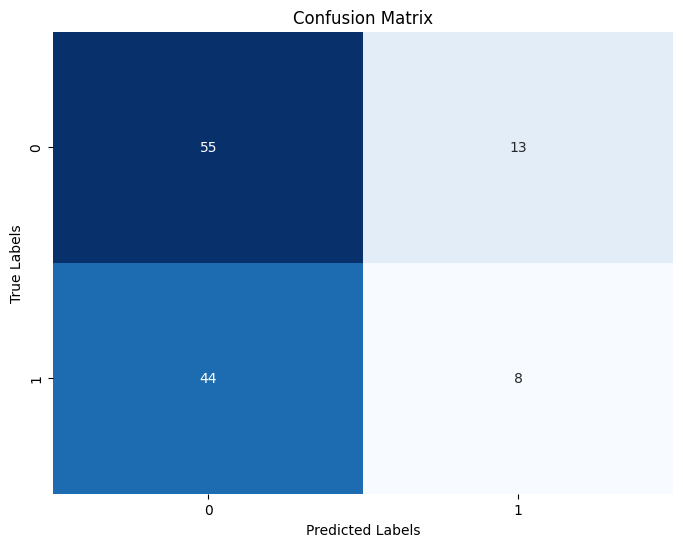

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define paths to the SIFT feature CSV files and the label files
axial_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv'
coronal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv'
sagittal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv'

axial_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv'
coronal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv'
sagittal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv'

train_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv'
valid_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv'

# Load Features from CSV Files
axial_features_df = pd.read_csv(axial_train_save_path)
coronal_features_df = pd.read_csv(coronal_train_save_path)
sagittal_features_df = pd.read_csv(sagittal_train_save_path)

axial_test_features_df = pd.read_csv(axial_valid_save_path)
coronal_test_features_df = pd.read_csv(coronal_valid_save_path)
sagittal_test_features_df = pd.read_csv(sagittal_valid_save_path)

# Convert string representations of lists into actual lists
axial_features_df['sift_descriptors'] = axial_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_features_df['sift_descriptors'] = coronal_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_features_df['sift_descriptors'] = sagittal_features_df['sift_descriptors'].apply(ast.literal_eval)

axial_test_features_df['sift_descriptors'] = axial_test_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_test_features_df['sift_descriptors'] = coronal_test_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_test_features_df['sift_descriptors'] = sagittal_test_features_df['sift_descriptors'].apply(ast.literal_eval)

# Convert DataFrames to NumPy arrays
axial_features_np = np.array(axial_features_df['sift_descriptors'].tolist())
coronal_features_np = np.array(coronal_features_df['sift_descriptors'].tolist())
sagittal_features_np = np.array(sagittal_features_df['sift_descriptors'].tolist())

axial_test_features_np = np.array(axial_test_features_df['sift_descriptors'].tolist())
coronal_test_features_np = np.array(coronal_test_features_df['sift_descriptors'].tolist())
sagittal_test_features_np = np.array(sagittal_test_features_df['sift_descriptors'].tolist())

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Debug prints to check the data shapes and types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

# Load ACL labels
train_labels = pd.read_csv(train_labels_path, header=None)
valid_labels = pd.read_csv(valid_labels_path, header=None)

# Extract labels from the second column
y_train = train_labels.iloc[:, 1].values
y_test = valid_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the AdaBoost classifier
adaboost_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)

# Train the AdaBoost classifier
adaboost_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = adaboost_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


X_train shape: (1130, 384)
X_test shape: (120, 384)
X_train dtype: float64
X_test dtype: float64
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        66
           1       0.00      0.00      0.00        54

    accuracy                           0.55       120
   macro avg       0.28      0.50      0.35       120
weighted avg       0.30      0.55      0.39       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


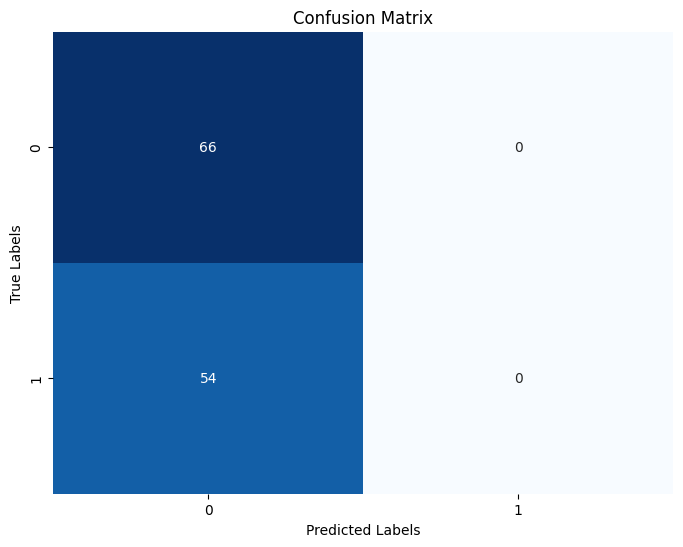

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define paths to the SIFT feature CSV files and the label files
axial_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv'
coronal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv'
sagittal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv'

axial_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv'
coronal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv'
sagittal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv'

train_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv'
valid_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv'

# Load Features from CSV Files
axial_features_df = pd.read_csv(axial_train_save_path)
coronal_features_df = pd.read_csv(coronal_train_save_path)
sagittal_features_df = pd.read_csv(sagittal_train_save_path)

axial_test_features_df = pd.read_csv(axial_valid_save_path)
coronal_test_features_df = pd.read_csv(coronal_valid_save_path)
sagittal_test_features_df = pd.read_csv(sagittal_valid_save_path)

# Convert string representations of lists into actual lists
axial_features_df['sift_descriptors'] = axial_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_features_df['sift_descriptors'] = coronal_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_features_df['sift_descriptors'] = sagittal_features_df['sift_descriptors'].apply(ast.literal_eval)

axial_test_features_df['sift_descriptors'] = axial_test_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_test_features_df['sift_descriptors'] = coronal_test_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_test_features_df['sift_descriptors'] = sagittal_test_features_df['sift_descriptors'].apply(ast.literal_eval)

# Convert DataFrames to NumPy arrays
axial_features_np = np.array(axial_features_df['sift_descriptors'].tolist())
coronal_features_np = np.array(coronal_features_df['sift_descriptors'].tolist())
sagittal_features_np = np.array(sagittal_features_df['sift_descriptors'].tolist())

axial_test_features_np = np.array(axial_test_features_df['sift_descriptors'].tolist())
coronal_test_features_np = np.array(coronal_test_features_df['sift_descriptors'].tolist())
sagittal_test_features_np = np.array(sagittal_test_features_df['sift_descriptors'].tolist())

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Debug prints to check the data shapes and types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

# Load ACL labels
train_labels = pd.read_csv(train_labels_path, header=None)
valid_labels = pd.read_csv(valid_labels_path, header=None)

# Extract labels from the second column
y_train = train_labels.iloc[:, 1].values
y_test = valid_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# Train the Random Forest classifier
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


X_train shape: (1130, 384)
X_test shape: (120, 384)
X_train dtype: float64
X_test dtype: float64
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        25
           1       0.80      1.00      0.89        95

    accuracy                           0.80       120
   macro avg       0.90      0.52      0.48       120
weighted avg       0.84      0.80      0.72       120



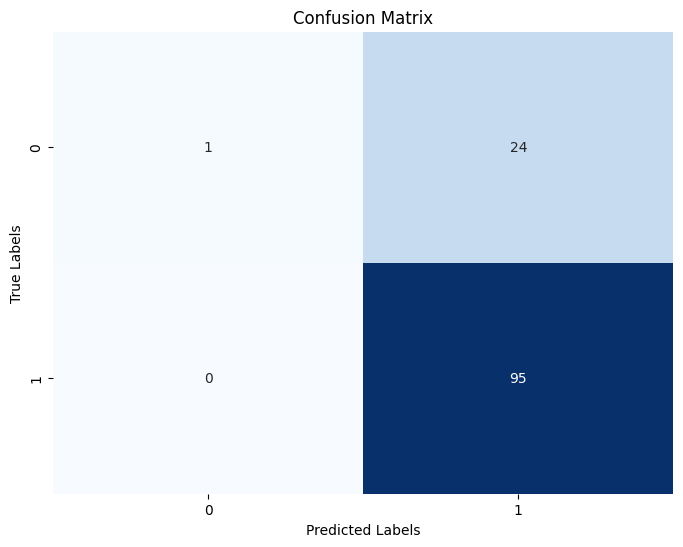

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define paths to the SIFT feature CSV files and the label files
axial_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv'
coronal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv'
sagittal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv'

axial_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv'
coronal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv'
sagittal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv'

train_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv'
valid_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv'

# Load Features from CSV Files
axial_features_df = pd.read_csv(axial_train_save_path)
coronal_features_df = pd.read_csv(coronal_train_save_path)
sagittal_features_df = pd.read_csv(sagittal_train_save_path)

axial_test_features_df = pd.read_csv(axial_valid_save_path)
coronal_test_features_df = pd.read_csv(coronal_valid_save_path)
sagittal_test_features_df = pd.read_csv(sagittal_valid_save_path)

# Convert string representations of lists into actual lists
axial_features_df['sift_descriptors'] = axial_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_features_df['sift_descriptors'] = coronal_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_features_df['sift_descriptors'] = sagittal_features_df['sift_descriptors'].apply(ast.literal_eval)

axial_test_features_df['sift_descriptors'] = axial_test_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_test_features_df['sift_descriptors'] = coronal_test_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_test_features_df['sift_descriptors'] = sagittal_test_features_df['sift_descriptors'].apply(ast.literal_eval)

# Convert DataFrames to NumPy arrays
axial_features_np = np.array(axial_features_df['sift_descriptors'].tolist())
coronal_features_np = np.array(coronal_features_df['sift_descriptors'].tolist())
sagittal_features_np = np.array(sagittal_features_df['sift_descriptors'].tolist())

axial_test_features_np = np.array(axial_test_features_df['sift_descriptors'].tolist())
coronal_test_features_np = np.array(coronal_test_features_df['sift_descriptors'].tolist())
sagittal_test_features_np = np.array(sagittal_test_features_df['sift_descriptors'].tolist())

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Debug prints to check the data shapes and types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

# Load ACL labels
train_labels = pd.read_csv(train_labels_path, header=None)
valid_labels = pd.read_csv(valid_labels_path, header=None)

# Extract labels from the second column
y_train = train_labels.iloc[:, 1].values
y_test = valid_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# Train the Random Forest classifier
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


X_train shape: (1130, 384)
X_test shape: (120, 384)
X_train dtype: float64
X_test dtype: float64
Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.99      0.72        68
           1       0.67      0.04      0.07        52

    accuracy                           0.57       120
   macro avg       0.62      0.51      0.40       120
weighted avg       0.61      0.57      0.44       120



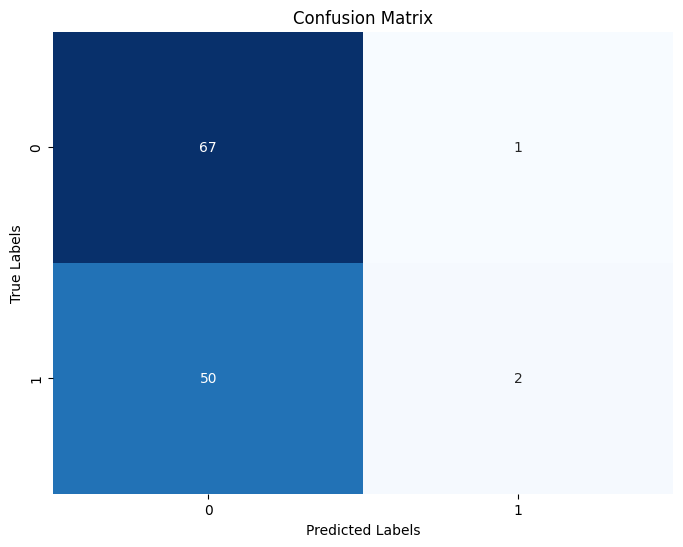

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define paths to the SIFT feature CSV files and the label files
axial_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv'
coronal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv'
sagittal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv'

axial_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv'
coronal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv'
sagittal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv'

train_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv'
valid_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv'

# Load Features from CSV Files
axial_features_df = pd.read_csv(axial_train_save_path)
coronal_features_df = pd.read_csv(coronal_train_save_path)
sagittal_features_df = pd.read_csv(sagittal_train_save_path)

axial_test_features_df = pd.read_csv(axial_valid_save_path)
coronal_test_features_df = pd.read_csv(coronal_valid_save_path)
sagittal_test_features_df = pd.read_csv(sagittal_valid_save_path)

# Convert string representations of lists into actual lists
axial_features_df['sift_descriptors'] = axial_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_features_df['sift_descriptors'] = coronal_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_features_df['sift_descriptors'] = sagittal_features_df['sift_descriptors'].apply(ast.literal_eval)

axial_test_features_df['sift_descriptors'] = axial_test_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_test_features_df['sift_descriptors'] = coronal_test_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_test_features_df['sift_descriptors'] = sagittal_test_features_df['sift_descriptors'].apply(ast.literal_eval)

# Convert DataFrames to NumPy arrays
axial_features_np = np.array(axial_features_df['sift_descriptors'].tolist())
coronal_features_np = np.array(coronal_features_df['sift_descriptors'].tolist())
sagittal_features_np = np.array(sagittal_features_df['sift_descriptors'].tolist())

axial_test_features_np = np.array(axial_test_features_df['sift_descriptors'].tolist())
coronal_test_features_np = np.array(coronal_test_features_df['sift_descriptors'].tolist())
sagittal_test_features_np = np.array(sagittal_test_features_df['sift_descriptors'].tolist())

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Debug prints to check the data shapes and types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

# Load ACL labels
train_labels = pd.read_csv(train_labels_path, header=None)
valid_labels = pd.read_csv(valid_labels_path, header=None)

# Extract labels from the second column
y_train = train_labels.iloc[:, 1].values
y_test = valid_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# Train the Random Forest classifier
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


X_train shape: (1130, 384)
X_test shape: (120, 384)
X_train dtype: float64
X_test dtype: float64
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        66
           1       0.00      0.00      0.00        54

    accuracy                           0.55       120
   macro avg       0.28      0.50      0.35       120
weighted avg       0.30      0.55      0.39       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


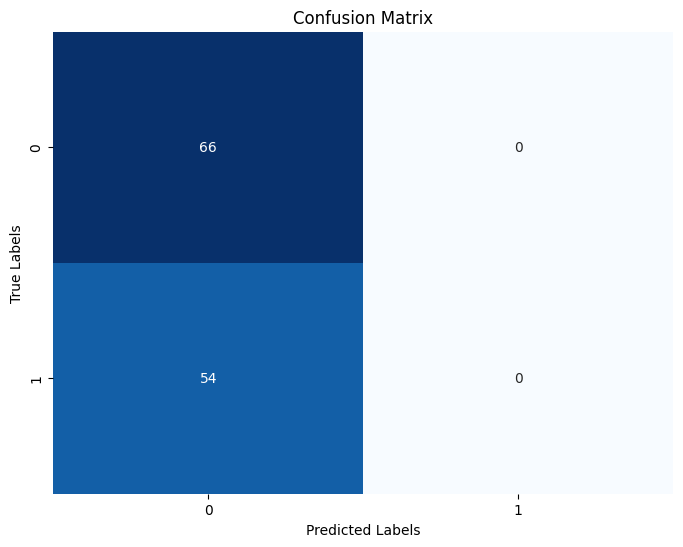

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define paths to the SIFT feature CSV files and the label files
axial_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv'
coronal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv'
sagittal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv'

axial_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv'
coronal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv'
sagittal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv'

train_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv'
valid_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv'

# Load Features from CSV Files
axial_features_df = pd.read_csv(axial_train_save_path)
coronal_features_df = pd.read_csv(coronal_train_save_path)
sagittal_features_df = pd.read_csv(sagittal_train_save_path)

axial_test_features_df = pd.read_csv(axial_valid_save_path)
coronal_test_features_df = pd.read_csv(coronal_valid_save_path)
sagittal_test_features_df = pd.read_csv(sagittal_valid_save_path)

# Convert string representations of lists into actual lists
axial_features_df['sift_descriptors'] = axial_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_features_df['sift_descriptors'] = coronal_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_features_df['sift_descriptors'] = sagittal_features_df['sift_descriptors'].apply(ast.literal_eval)

axial_test_features_df['sift_descriptors'] = axial_test_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_test_features_df['sift_descriptors'] = coronal_test_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_test_features_df['sift_descriptors'] = sagittal_test_features_df['sift_descriptors'].apply(ast.literal_eval)

# Convert DataFrames to NumPy arrays
axial_features_np = np.array(axial_features_df['sift_descriptors'].tolist())
coronal_features_np = np.array(coronal_features_df['sift_descriptors'].tolist())
sagittal_features_np = np.array(sagittal_features_df['sift_descriptors'].tolist())

axial_test_features_np = np.array(axial_test_features_df['sift_descriptors'].tolist())
coronal_test_features_np = np.array(coronal_test_features_df['sift_descriptors'].tolist())
sagittal_test_features_np = np.array(sagittal_test_features_df['sift_descriptors'].tolist())

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Debug prints to check the data shapes and types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

# Load ACL labels
train_labels = pd.read_csv(train_labels_path, header=None)
valid_labels = pd.read_csv(valid_labels_path, header=None)

# Extract labels from the second column
y_train = train_labels.iloc[:, 1].values
y_test = valid_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the Bagging classifier with Decision Trees as base estimators
bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)

# Train the Bagging classifier
bagging_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = bagging_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


X_train shape: (1130, 384)
X_test shape: (120, 384)
X_train dtype: float64
X_test dtype: float64
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        25
           1       0.80      1.00      0.89        95

    accuracy                           0.80       120
   macro avg       0.90      0.52      0.48       120
weighted avg       0.84      0.80      0.72       120



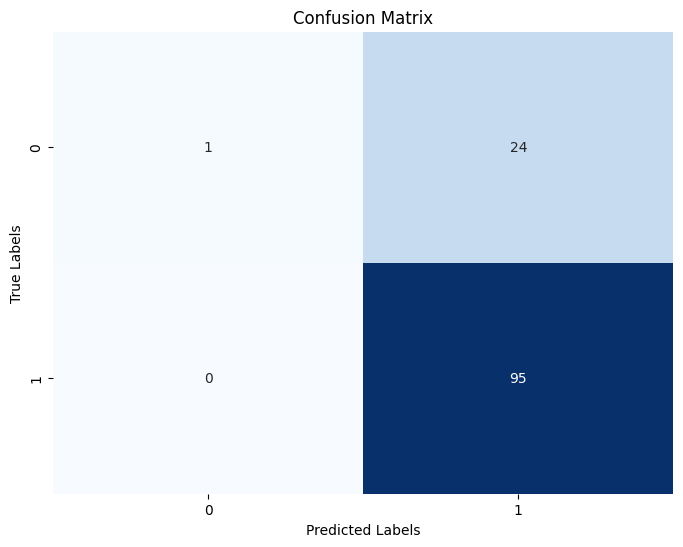

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define paths to the SIFT feature CSV files and the label files
axial_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv'
coronal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv'
sagittal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv'

axial_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv'
coronal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv'
sagittal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv'

train_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv'
valid_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv'

# Load Features from CSV Files
axial_features_df = pd.read_csv(axial_train_save_path)
coronal_features_df = pd.read_csv(coronal_train_save_path)
sagittal_features_df = pd.read_csv(sagittal_train_save_path)

axial_test_features_df = pd.read_csv(axial_valid_save_path)
coronal_test_features_df = pd.read_csv(coronal_valid_save_path)
sagittal_test_features_df = pd.read_csv(sagittal_valid_save_path)

# Convert string representations of lists into actual lists
axial_features_df['sift_descriptors'] = axial_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_features_df['sift_descriptors'] = coronal_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_features_df['sift_descriptors'] = sagittal_features_df['sift_descriptors'].apply(ast.literal_eval)

axial_test_features_df['sift_descriptors'] = axial_test_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_test_features_df['sift_descriptors'] = coronal_test_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_test_features_df['sift_descriptors'] = sagittal_test_features_df['sift_descriptors'].apply(ast.literal_eval)

# Convert DataFrames to NumPy arrays
axial_features_np = np.array(axial_features_df['sift_descriptors'].tolist())
coronal_features_np = np.array(coronal_features_df['sift_descriptors'].tolist())
sagittal_features_np = np.array(sagittal_features_df['sift_descriptors'].tolist())

axial_test_features_np = np.array(axial_test_features_df['sift_descriptors'].tolist())
coronal_test_features_np = np.array(coronal_test_features_df['sift_descriptors'].tolist())
sagittal_test_features_np = np.array(sagittal_test_features_df['sift_descriptors'].tolist())

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Debug prints to check the data shapes and types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

# Load ACL labels
train_labels = pd.read_csv(train_labels_path, header=None)
valid_labels = pd.read_csv(valid_labels_path, header=None)

# Extract labels from the second column
y_train = train_labels.iloc[:, 1].values
y_test = valid_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the Bagging classifier with Decision Trees as base estimators
bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)

# Train the Bagging classifier
bagging_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = bagging_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


X_train shape: (1130, 384)
X_test shape: (120, 384)
X_train dtype: float64
X_test dtype: float64
Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.99      0.72        68
           1       0.50      0.02      0.04        52

    accuracy                           0.57       120
   macro avg       0.53      0.50      0.38       120
weighted avg       0.54      0.57      0.42       120



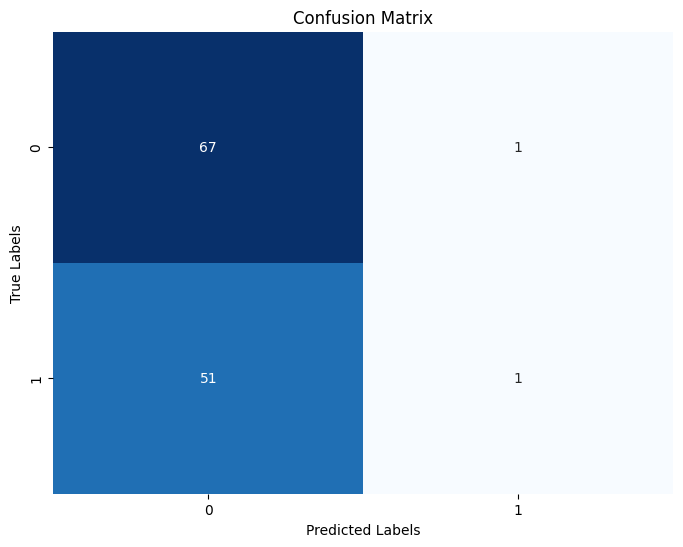

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define paths to the SIFT feature CSV files and the label files
axial_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv'
coronal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv'
sagittal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv'

axial_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv'
coronal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv'
sagittal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv'

train_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv'
valid_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv'

# Load Features from CSV Files
axial_features_df = pd.read_csv(axial_train_save_path)
coronal_features_df = pd.read_csv(coronal_train_save_path)
sagittal_features_df = pd.read_csv(sagittal_train_save_path)

axial_test_features_df = pd.read_csv(axial_valid_save_path)
coronal_test_features_df = pd.read_csv(coronal_valid_save_path)
sagittal_test_features_df = pd.read_csv(sagittal_valid_save_path)

# Convert string representations of lists into actual lists
axial_features_df['sift_descriptors'] = axial_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_features_df['sift_descriptors'] = coronal_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_features_df['sift_descriptors'] = sagittal_features_df['sift_descriptors'].apply(ast.literal_eval)

axial_test_features_df['sift_descriptors'] = axial_test_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_test_features_df['sift_descriptors'] = coronal_test_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_test_features_df['sift_descriptors'] = sagittal_test_features_df['sift_descriptors'].apply(ast.literal_eval)

# Convert DataFrames to NumPy arrays
axial_features_np = np.array(axial_features_df['sift_descriptors'].tolist())
coronal_features_np = np.array(coronal_features_df['sift_descriptors'].tolist())
sagittal_features_np = np.array(sagittal_features_df['sift_descriptors'].tolist())

axial_test_features_np = np.array(axial_test_features_df['sift_descriptors'].tolist())
coronal_test_features_np = np.array(coronal_test_features_df['sift_descriptors'].tolist())
sagittal_test_features_np = np.array(sagittal_test_features_df['sift_descriptors'].tolist())

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Debug prints to check the data shapes and types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

# Load ACL labels
train_labels = pd.read_csv(train_labels_path, header=None)
valid_labels = pd.read_csv(valid_labels_path, header=None)

# Extract labels from the second column
y_train = train_labels.iloc[:, 1].values
y_test = valid_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the Bagging classifier with Decision Trees as base estimators
bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=50,
    random_state=42
)

# Train the Bagging classifier
bagging_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = bagging_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


X_train shape: (1130, 384)
X_test shape: (120, 384)
X_train dtype: float64
X_test dtype: float64
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        66
           1       0.00      0.00      0.00        54

    accuracy                           0.55       120
   macro avg       0.28      0.50      0.35       120
weighted avg       0.30      0.55      0.39       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


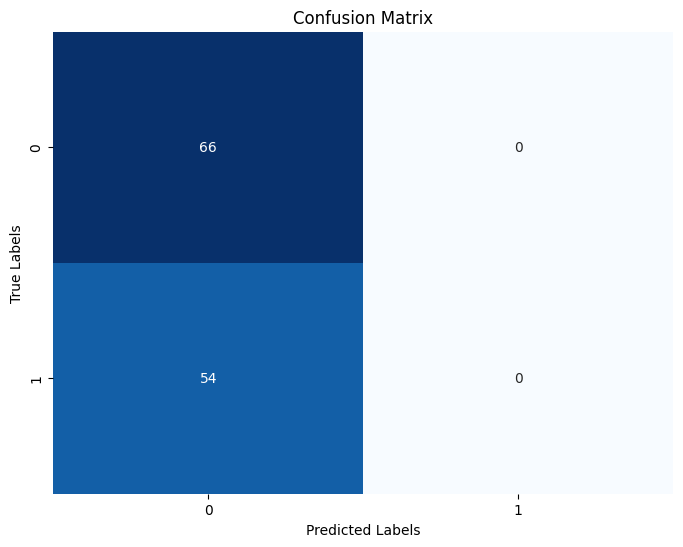

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define paths to the SIFT feature CSV files and the label files
axial_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv'
coronal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv'
sagittal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv'

axial_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv'
coronal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv'
sagittal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv'

train_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv'
valid_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv'

# Load Features from CSV Files
axial_features_df = pd.read_csv(axial_train_save_path)
coronal_features_df = pd.read_csv(coronal_train_save_path)
sagittal_features_df = pd.read_csv(sagittal_train_save_path)

axial_test_features_df = pd.read_csv(axial_valid_save_path)
coronal_test_features_df = pd.read_csv(coronal_valid_save_path)
sagittal_test_features_df = pd.read_csv(sagittal_valid_save_path)

# Convert string representations of lists into actual lists
axial_features_df['sift_descriptors'] = axial_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_features_df['sift_descriptors'] = coronal_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_features_df['sift_descriptors'] = sagittal_features_df['sift_descriptors'].apply(ast.literal_eval)

axial_test_features_df['sift_descriptors'] = axial_test_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_test_features_df['sift_descriptors'] = coronal_test_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_test_features_df['sift_descriptors'] = sagittal_test_features_df['sift_descriptors'].apply(ast.literal_eval)

# Convert DataFrames to NumPy arrays
axial_features_np = np.array(axial_features_df['sift_descriptors'].tolist())
coronal_features_np = np.array(coronal_features_df['sift_descriptors'].tolist())
sagittal_features_np = np.array(sagittal_features_df['sift_descriptors'].tolist())

axial_test_features_np = np.array(axial_test_features_df['sift_descriptors'].tolist())
coronal_test_features_np = np.array(coronal_test_features_df['sift_descriptors'].tolist())
sagittal_test_features_np = np.array(sagittal_test_features_df['sift_descriptors'].tolist())

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Debug prints to check the data shapes and types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

# Load ACL labels
train_labels = pd.read_csv(train_labels_path, header=None)
valid_labels = pd.read_csv(valid_labels_path, header=None)

# Extract labels from the second column
y_train = train_labels.iloc[:, 1].values
y_test = valid_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the base estimators
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('svc', SVC(kernel='linear', probability=True))
]

# Initialize the final estimator
final_estimator = LogisticRegression()

# Initialize the Stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)

# Train the Stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = stacking_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


X_train shape: (1130, 384)
X_test shape: (120, 384)
X_train dtype: float64
X_test dtype: float64
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


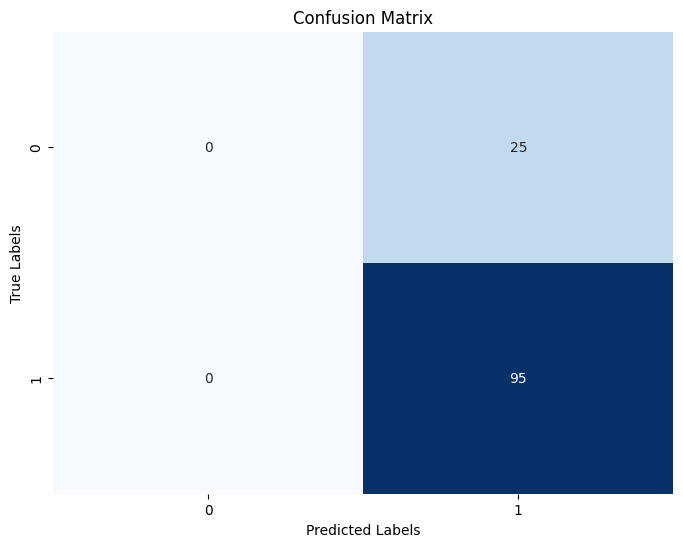

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define paths to the SIFT feature CSV files and the label files
axial_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv'
coronal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv'
sagittal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv'

axial_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv'
coronal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv'
sagittal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv'

train_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv'
valid_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv'

# Load Features from CSV Files
axial_features_df = pd.read_csv(axial_train_save_path)
coronal_features_df = pd.read_csv(coronal_train_save_path)
sagittal_features_df = pd.read_csv(sagittal_train_save_path)

axial_test_features_df = pd.read_csv(axial_valid_save_path)
coronal_test_features_df = pd.read_csv(coronal_valid_save_path)
sagittal_test_features_df = pd.read_csv(sagittal_valid_save_path)

# Convert string representations of lists into actual lists
axial_features_df['sift_descriptors'] = axial_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_features_df['sift_descriptors'] = coronal_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_features_df['sift_descriptors'] = sagittal_features_df['sift_descriptors'].apply(ast.literal_eval)

axial_test_features_df['sift_descriptors'] = axial_test_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_test_features_df['sift_descriptors'] = coronal_test_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_test_features_df['sift_descriptors'] = sagittal_test_features_df['sift_descriptors'].apply(ast.literal_eval)

# Convert DataFrames to NumPy arrays
axial_features_np = np.array(axial_features_df['sift_descriptors'].tolist())
coronal_features_np = np.array(coronal_features_df['sift_descriptors'].tolist())
sagittal_features_np = np.array(sagittal_features_df['sift_descriptors'].tolist())

axial_test_features_np = np.array(axial_test_features_df['sift_descriptors'].tolist())
coronal_test_features_np = np.array(coronal_test_features_df['sift_descriptors'].tolist())
sagittal_test_features_np = np.array(sagittal_test_features_df['sift_descriptors'].tolist())

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Debug prints to check the data shapes and types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

# Load ACL labels
train_labels = pd.read_csv(train_labels_path, header=None)
valid_labels = pd.read_csv(valid_labels_path, header=None)

# Extract labels from the second column
y_train = train_labels.iloc[:, 1].values
y_test = valid_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the base estimators
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('svc', SVC(kernel='linear', probability=True))
]

# Initialize the final estimator
final_estimator = LogisticRegression()

# Initialize the Stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)

# Train the Stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = stacking_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


X_train shape: (1130, 384)
X_test shape: (120, 384)
X_train dtype: float64
X_test dtype: float64
Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        68
           1       0.00      0.00      0.00        52

    accuracy                           0.57       120
   macro avg       0.28      0.50      0.36       120
weighted avg       0.32      0.57      0.41       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


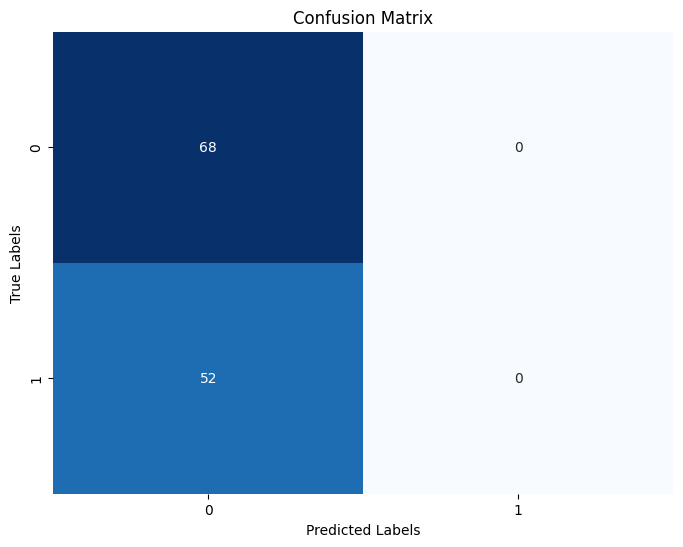

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define paths to the SIFT feature CSV files and the label files
axial_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv'
coronal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv'
sagittal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv'

axial_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv'
coronal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv'
sagittal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv'

train_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv'
valid_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv'

# Load Features from CSV Files
axial_features_df = pd.read_csv(axial_train_save_path)
coronal_features_df = pd.read_csv(coronal_train_save_path)
sagittal_features_df = pd.read_csv(sagittal_train_save_path)

axial_test_features_df = pd.read_csv(axial_valid_save_path)
coronal_test_features_df = pd.read_csv(coronal_valid_save_path)
sagittal_test_features_df = pd.read_csv(sagittal_valid_save_path)

# Convert string representations of lists into actual lists
axial_features_df['sift_descriptors'] = axial_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_features_df['sift_descriptors'] = coronal_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_features_df['sift_descriptors'] = sagittal_features_df['sift_descriptors'].apply(ast.literal_eval)

axial_test_features_df['sift_descriptors'] = axial_test_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_test_features_df['sift_descriptors'] = coronal_test_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_test_features_df['sift_descriptors'] = sagittal_test_features_df['sift_descriptors'].apply(ast.literal_eval)

# Convert DataFrames to NumPy arrays
axial_features_np = np.array(axial_features_df['sift_descriptors'].tolist())
coronal_features_np = np.array(coronal_features_df['sift_descriptors'].tolist())
sagittal_features_np = np.array(sagittal_features_df['sift_descriptors'].tolist())

axial_test_features_np = np.array(axial_test_features_df['sift_descriptors'].tolist())
coronal_test_features_np = np.array(coronal_test_features_df['sift_descriptors'].tolist())
sagittal_test_features_np = np.array(sagittal_test_features_df['sift_descriptors'].tolist())

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Debug prints to check the data shapes and types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

# Load ACL labels
train_labels = pd.read_csv(train_labels_path, header=None)
valid_labels = pd.read_csv(valid_labels_path, header=None)

# Extract labels from the second column
y_train = train_labels.iloc[:, 1].values
y_test = valid_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the base estimators
base_estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('svc', SVC(kernel='linear', probability=True))
]

# Initialize the final estimator
final_estimator = LogisticRegression()

# Initialize the Stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)

# Train the Stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = stacking_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


X_train shape: (1130, 384)
X_test shape: (120, 384)
X_train dtype: float64
X_test dtype: float64
Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.80      0.63        66
           1       0.32      0.11      0.16        54

    accuracy                           0.49       120
   macro avg       0.42      0.46      0.40       120
weighted avg       0.43      0.49      0.42       120



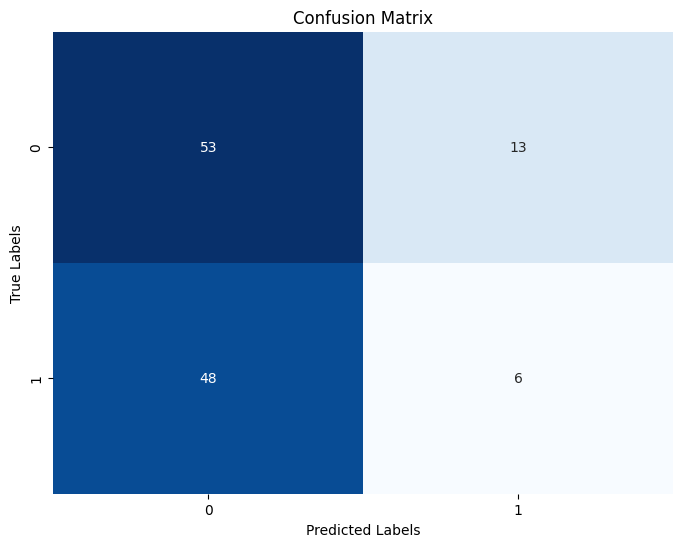

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define paths to the SIFT feature CSV files and the label files
axial_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv'
coronal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv'
sagittal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv'

axial_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv'
coronal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv'
sagittal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv'

train_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-acl.csv'
valid_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-acl.csv'

# Load Features from CSV Files
axial_features_df = pd.read_csv(axial_train_save_path)
coronal_features_df = pd.read_csv(coronal_train_save_path)
sagittal_features_df = pd.read_csv(sagittal_train_save_path)

axial_test_features_df = pd.read_csv(axial_valid_save_path)
coronal_test_features_df = pd.read_csv(coronal_valid_save_path)
sagittal_test_features_df = pd.read_csv(sagittal_valid_save_path)

# Convert string representations of lists into actual lists
axial_features_df['sift_descriptors'] = axial_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_features_df['sift_descriptors'] = coronal_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_features_df['sift_descriptors'] = sagittal_features_df['sift_descriptors'].apply(ast.literal_eval)

axial_test_features_df['sift_descriptors'] = axial_test_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_test_features_df['sift_descriptors'] = coronal_test_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_test_features_df['sift_descriptors'] = sagittal_test_features_df['sift_descriptors'].apply(ast.literal_eval)

# Convert DataFrames to NumPy arrays
axial_features_np = np.array(axial_features_df['sift_descriptors'].tolist())
coronal_features_np = np.array(coronal_features_df['sift_descriptors'].tolist())
sagittal_features_np = np.array(sagittal_features_df['sift_descriptors'].tolist())

axial_test_features_np = np.array(axial_test_features_df['sift_descriptors'].tolist())
coronal_test_features_np = np.array(coronal_test_features_df['sift_descriptors'].tolist())
sagittal_test_features_np = np.array(sagittal_test_features_df['sift_descriptors'].tolist())

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Debug prints to check the data shapes and types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

# Load ACL labels
train_labels = pd.read_csv(train_labels_path, header=None)
valid_labels = pd.read_csv(valid_labels_path, header=None)

# Extract labels from the second column
y_train = train_labels.iloc[:, 1].values
y_test = valid_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the SVM classifier with a linear kernel
svm_clf = SVC(kernel='linear', probability=True)

# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


X_train shape: (1130, 384)
X_test shape: (120, 384)
X_train dtype: float64
X_test dtype: float64
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.24      0.26        25
           1       0.81      0.84      0.82        95

    accuracy                           0.72       120
   macro avg       0.55      0.54      0.54       120
weighted avg       0.70      0.72      0.71       120



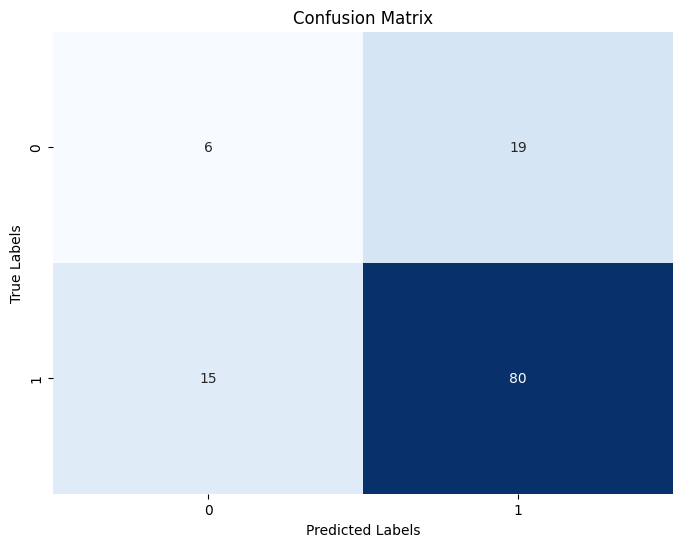

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define paths to the SIFT feature CSV files and the label files
axial_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv'
coronal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv'
sagittal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv'

axial_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv'
coronal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv'
sagittal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv'

train_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-abnormal.csv'
valid_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-abnormal.csv'

# Load Features from CSV Files
axial_features_df = pd.read_csv(axial_train_save_path)
coronal_features_df = pd.read_csv(coronal_train_save_path)
sagittal_features_df = pd.read_csv(sagittal_train_save_path)

axial_test_features_df = pd.read_csv(axial_valid_save_path)
coronal_test_features_df = pd.read_csv(coronal_valid_save_path)
sagittal_test_features_df = pd.read_csv(sagittal_valid_save_path)

# Convert string representations of lists into actual lists
axial_features_df['sift_descriptors'] = axial_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_features_df['sift_descriptors'] = coronal_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_features_df['sift_descriptors'] = sagittal_features_df['sift_descriptors'].apply(ast.literal_eval)

axial_test_features_df['sift_descriptors'] = axial_test_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_test_features_df['sift_descriptors'] = coronal_test_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_test_features_df['sift_descriptors'] = sagittal_test_features_df['sift_descriptors'].apply(ast.literal_eval)

# Convert DataFrames to NumPy arrays
axial_features_np = np.array(axial_features_df['sift_descriptors'].tolist())
coronal_features_np = np.array(coronal_features_df['sift_descriptors'].tolist())
sagittal_features_np = np.array(sagittal_features_df['sift_descriptors'].tolist())

axial_test_features_np = np.array(axial_test_features_df['sift_descriptors'].tolist())
coronal_test_features_np = np.array(coronal_test_features_df['sift_descriptors'].tolist())
sagittal_test_features_np = np.array(sagittal_test_features_df['sift_descriptors'].tolist())

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Debug prints to check the data shapes and types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

# Load ACL labels
train_labels = pd.read_csv(train_labels_path, header=None)
valid_labels = pd.read_csv(valid_labels_path, header=None)

# Extract labels from the second column
y_train = train_labels.iloc[:, 1].values
y_test = valid_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the SVM classifier with a linear kernel
svm_clf = SVC(kernel='linear', probability=True)

# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


X_train shape: (1130, 384)
X_test shape: (120, 384)
X_train dtype: float64
X_test dtype: float64
Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.76      0.68        68
           1       0.54      0.37      0.44        52

    accuracy                           0.59       120
   macro avg       0.58      0.57      0.56       120
weighted avg       0.58      0.59      0.57       120



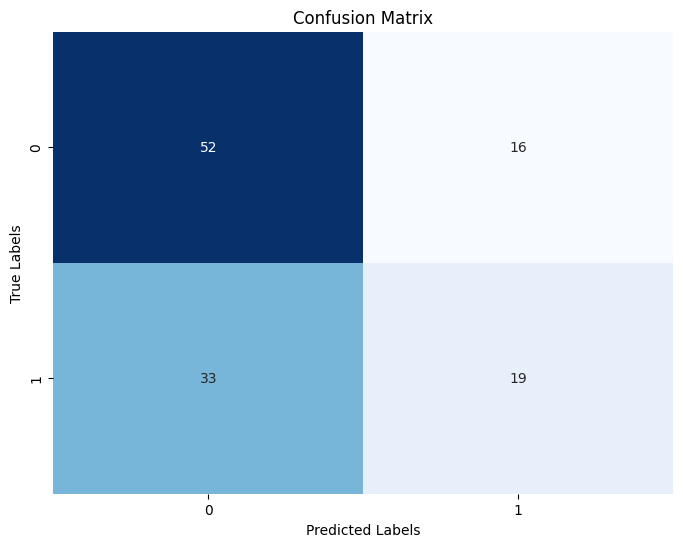

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

# Ignore specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define paths to the SIFT feature CSV files and the label files
axial_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv'
coronal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv'
sagittal_train_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv'

axial_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv'
coronal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv'
sagittal_valid_save_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv'

train_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train-meniscus.csv'
valid_labels_path = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid-meniscus.csv'

# Load Features from CSV Files
axial_features_df = pd.read_csv(axial_train_save_path)
coronal_features_df = pd.read_csv(coronal_train_save_path)
sagittal_features_df = pd.read_csv(sagittal_train_save_path)

axial_test_features_df = pd.read_csv(axial_valid_save_path)
coronal_test_features_df = pd.read_csv(coronal_valid_save_path)
sagittal_test_features_df = pd.read_csv(sagittal_valid_save_path)

# Convert string representations of lists into actual lists
axial_features_df['sift_descriptors'] = axial_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_features_df['sift_descriptors'] = coronal_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_features_df['sift_descriptors'] = sagittal_features_df['sift_descriptors'].apply(ast.literal_eval)

axial_test_features_df['sift_descriptors'] = axial_test_features_df['sift_descriptors'].apply(ast.literal_eval)
coronal_test_features_df['sift_descriptors'] = coronal_test_features_df['sift_descriptors'].apply(ast.literal_eval)
sagittal_test_features_df['sift_descriptors'] = sagittal_test_features_df['sift_descriptors'].apply(ast.literal_eval)

# Convert DataFrames to NumPy arrays
axial_features_np = np.array(axial_features_df['sift_descriptors'].tolist())
coronal_features_np = np.array(coronal_features_df['sift_descriptors'].tolist())
sagittal_features_np = np.array(sagittal_features_df['sift_descriptors'].tolist())

axial_test_features_np = np.array(axial_test_features_df['sift_descriptors'].tolist())
coronal_test_features_np = np.array(coronal_test_features_df['sift_descriptors'].tolist())
sagittal_test_features_np = np.array(sagittal_test_features_df['sift_descriptors'].tolist())

# Combine the training datasets
X_train = np.concatenate([axial_features_np, coronal_features_np, sagittal_features_np], axis=1)
X_test = np.concatenate([axial_test_features_np, coronal_test_features_np, sagittal_test_features_np], axis=1)

# Debug prints to check the data shapes and types
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train dtype:", X_train.dtype)
print("X_test dtype:", X_test.dtype)

# Load ACL labels
train_labels = pd.read_csv(train_labels_path, header=None)
valid_labels = pd.read_csv(valid_labels_path, header=None)

# Extract labels from the second column
y_train = train_labels.iloc[:, 1].values
y_test = valid_labels.iloc[:, 1].values

# Ensure that the number of samples matches the number of labels
assert X_train.shape[0] == len(y_train), "Mismatch in the number of training samples and labels"
assert X_test.shape[0] == len(y_test), "Mismatch in the number of testing samples and labels"

# Initialize the SVM classifier with a linear kernel
svm_clf = SVC(kernel='linear', probability=True)

# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import ast

# Define a function to convert strings to lists of floats
def convert_string_to_float_list(s):
    try:
        return [float(i) for i in ast.literal_eval(s)]
    except:
        return s

# Flatten the list columns into separate columns
def flatten_columns(df):
    new_df = pd.DataFrame()
    for col in df.columns:
        if isinstance(df[col].iloc[0], list):
            expanded_df = pd.DataFrame(df[col].tolist(), index=df.index)
            expanded_df.columns = [f"{col}_{i}" for i in range(expanded_df.shape[1])]
            new_df = pd.concat([new_df, expanded_df], axis=1)
        else:
            new_df[col] = df[col]
    return new_df

# Load and preprocess features
def load_and_preprocess_features(file_path):
    df = pd.read_csv(file_path)
    # Apply conversion to all elements in the DataFrame
    for col in df.columns:
        df[col] = df[col].apply(convert_string_to_float_list)
    return flatten_columns(df)

# Load and preprocess training features
axial_stat_train_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_statistical_features.csv')
coronal_stat_train_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_statistical_features.csv')
sagittal_stat_train_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_statistical_features.csv')

axial_text_train_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_textural_features.csv')
coronal_text_train_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_textural_features.csv')
sagittal_text_train_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_textural_features.csv')

axial_hog_train_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_hog_features.csv')
coronal_hog_train_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_hog_features.csv')
sagittal_hog_train_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_hog_features.csv')

axial_sift_train_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/axial_sift_features.csv')
coronal_sift_train_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/coronal_sift_features.csv')
sagittal_sift_train_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/train/sagittal_sift_features.csv')

# Concatenate all training features
X_train_features = pd.concat([axial_stat_train_features, coronal_stat_train_features, sagittal_stat_train_features,
                              axial_text_train_features, coronal_text_train_features, sagittal_text_train_features,
                              axial_sift_train_features, coronal_sift_train_features, sagittal_sift_train_features], axis=1)

# Load and preprocess test features
axial_stat_test_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_statistical_test_features.csv')
coronal_stat_test_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_statistical_test_features.csv')
sagittal_stat_test_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_statistical_test_features.csv')

axial_text_test_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_textural_test_features.csv')
coronal_text_test_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_textural_test_features.csv')
sagittal_text_test_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_textural_test_features.csv')

axial_hog_test_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_hog_test_features.csv')
coronal_hog_test_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_hog_test_features.csv')
sagittal_hog_test_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_hog_test_features2.csv')

axial_sift_test_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/axial_sift_test_features.csv')
coronal_sift_test_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/coronal_sift_test_features.csv')
sagittal_sift_test_features = load_and_preprocess_features('/content/gdrive/MyDrive/Dataset/MRNet-v1.0/valid/sagittal_sift_test_features.csv')

# Concatenate all test features
X_test_features = pd.concat([axial_stat_test_features, coronal_stat_test_features, sagittal_stat_test_features,
                             axial_text_test_features, coronal_text_test_features, sagittal_text_test_features,
                             axial_sift_test_features, coronal_sift_test_features, sagittal_sift_test_features], axis=1)



Accuracy: 0.5

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.88      0.66        66
           1       0.20      0.04      0.06        54

    accuracy                           0.50       120
   macro avg       0.36      0.46      0.36       120
weighted avg       0.38      0.50      0.39       120


Confusion Matrix:
[[58  8]
 [52  2]]


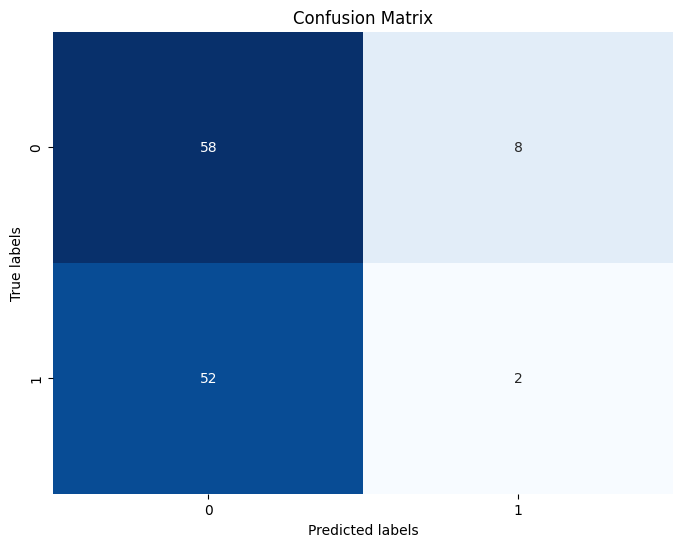

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to convert strings to lists of floats
def convert_string_to_float_list(s):
    try:
        return [float(i) for i in ast.literal_eval(s)]
    except:
        return s

# Flatten the list columns into separate columns
def flatten_columns(df):
    new_df = pd.DataFrame()
    for col in df.columns:
        if isinstance(df[col].iloc[0], list):
            expanded_df = pd.DataFrame(df[col].tolist(), index=df.index)
            expanded_df.columns = [f"{col}_{i}" for i in range(expanded_df.shape[1])]
            new_df = pd.concat([new_df, expanded_df], axis=1)
        else:
            new_df[col] = df[col]
    return new_df

# Load and preprocess features
def load_and_preprocess_features(file_path):
    df = pd.read_csv(file_path)
    for col in df.columns:
        df[col] = df[col].apply(convert_string_to_float_list)
    df = flatten_columns(df)
    return df

# Define file paths for training and test datasets
train_files = [
    'axial_statistical_features.csv', 'coronal_statistical_features.csv', 'sagittal_statistical_features.csv',
    'axial_textural_features.csv', 'coronal_textural_features.csv', 'sagittal_textural_features.csv',
    'axial_sift_features.csv', 'coronal_sift_features.csv', 'sagittal_sift_features.csv'
]

test_files = [
    'axial_statistical_test_features.csv', 'coronal_statistical_test_features.csv', 'sagittal_statistical_test_features.csv',
    'axial_textural_test_features.csv', 'coronal_textural_test_features.csv', 'sagittal_textural_test_features.csv',
    'axial_sift_test_features.csv', 'coronal_sift_test_features.csv', 'sagittal_sift_test_features.csv'
]

# Base directory path
base_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/'

# Load and preprocess training features
train_dfs = [load_and_preprocess_features(base_dir + 'train/' + file) for file in train_files]
X_train_features = pd.concat(train_dfs, axis=1)

# Load and preprocess test features
test_dfs = [load_and_preprocess_features(base_dir + 'valid/' + file) for file in test_files]
X_test_features = pd.concat(test_dfs, axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_features)
X_test_imputed = imputer.transform(X_test_features)

# Load labels
y_train = acl_label
y_test = acl_test_label

# Train AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_imputed, y_train)

# Make predictions
y_pred = clf.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.725

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.08      0.11        25
           1       0.79      0.89      0.84        95

    accuracy                           0.73       120
   macro avg       0.48      0.49      0.47       120
weighted avg       0.66      0.72      0.69       120


Confusion Matrix:
[[ 2 23]
 [10 85]]


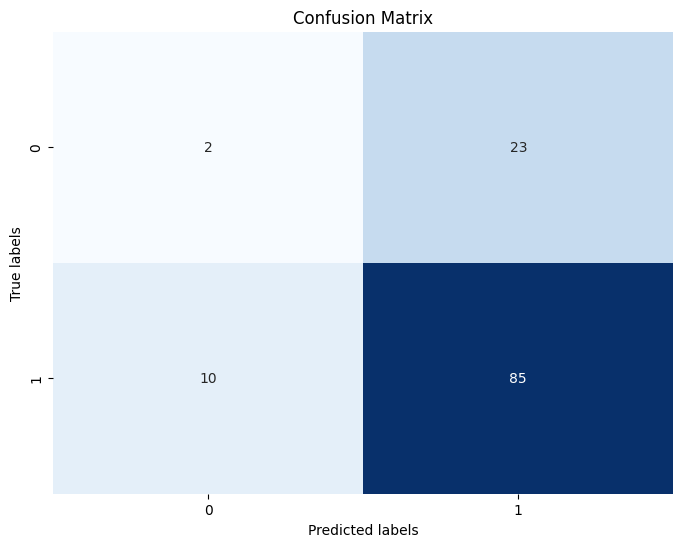

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to convert strings to lists of floats
def convert_string_to_float_list(s):
    try:
        return [float(i) for i in ast.literal_eval(s)]
    except:
        return s

# Flatten the list columns into separate columns
def flatten_columns(df):
    new_df = pd.DataFrame()
    for col in df.columns:
        if isinstance(df[col].iloc[0], list):
            expanded_df = pd.DataFrame(df[col].tolist(), index=df.index)
            expanded_df.columns = [f"{col}_{i}" for i in range(expanded_df.shape[1])]
            new_df = pd.concat([new_df, expanded_df], axis=1)
        else:
            new_df[col] = df[col]
    return new_df

# Load and preprocess features
def load_and_preprocess_features(file_path):
    df = pd.read_csv(file_path)
    for col in df.columns:
        df[col] = df[col].apply(convert_string_to_float_list)
    df = flatten_columns(df)
    return df

# Define file paths for training and test datasets
train_files = [
    'axial_statistical_features.csv', 'coronal_statistical_features.csv', 'sagittal_statistical_features.csv',
    'axial_textural_features.csv', 'coronal_textural_features.csv', 'sagittal_textural_features.csv',
    'axial_sift_features.csv', 'coronal_sift_features.csv', 'sagittal_sift_features.csv'
]

test_files = [
    'axial_statistical_test_features.csv', 'coronal_statistical_test_features.csv', 'sagittal_statistical_test_features.csv',
    'axial_textural_test_features.csv', 'coronal_textural_test_features.csv', 'sagittal_textural_test_features.csv',
    'axial_sift_test_features.csv', 'coronal_sift_test_features.csv', 'sagittal_sift_test_features.csv'
]

# Base directory path
base_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/'

# Load and preprocess training features
train_dfs = [load_and_preprocess_features(base_dir + 'train/' + file) for file in train_files]
X_train_features = pd.concat(train_dfs, axis=1)

# Load and preprocess test features
test_dfs = [load_and_preprocess_features(base_dir + 'valid/' + file) for file in test_files]
X_test_features = pd.concat(test_dfs, axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_features)
X_test_imputed = imputer.transform(X_test_features)

# Load labels
y_train = abnormal_label
y_test = abnormal_test_label

# Train AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_imputed, y_train)

# Make predictions
y_pred = clf.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.5

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.59      0.57        68
           1       0.42      0.38      0.40        52

    accuracy                           0.50       120
   macro avg       0.49      0.49      0.49       120
weighted avg       0.50      0.50      0.50       120


Confusion Matrix:
[[40 28]
 [32 20]]


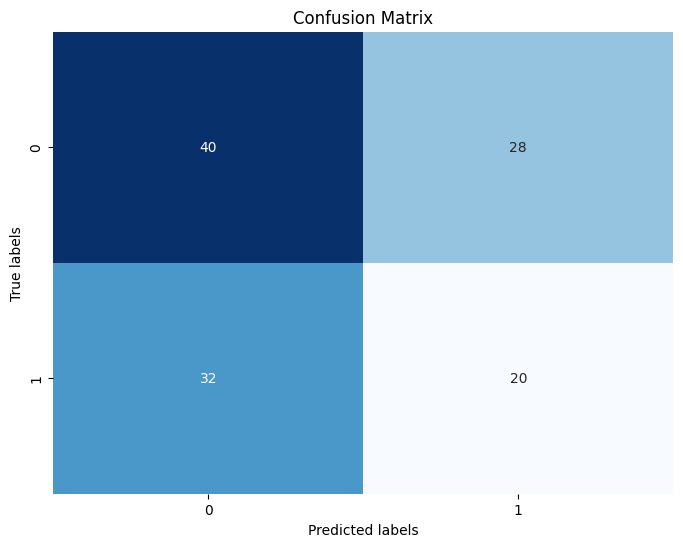

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to convert strings to lists of floats
def convert_string_to_float_list(s):
    try:
        return [float(i) for i in ast.literal_eval(s)]
    except:
        return s

# Flatten the list columns into separate columns
def flatten_columns(df):
    new_df = pd.DataFrame()
    for col in df.columns:
        if isinstance(df[col].iloc[0], list):
            expanded_df = pd.DataFrame(df[col].tolist(), index=df.index)
            expanded_df.columns = [f"{col}_{i}" for i in range(expanded_df.shape[1])]
            new_df = pd.concat([new_df, expanded_df], axis=1)
        else:
            new_df[col] = df[col]
    return new_df

# Load and preprocess features
def load_and_preprocess_features(file_path):
    df = pd.read_csv(file_path)
    for col in df.columns:
        df[col] = df[col].apply(convert_string_to_float_list)
    df = flatten_columns(df)
    return df

# Define file paths for training and test datasets
train_files = [
    'axial_statistical_features.csv', 'coronal_statistical_features.csv', 'sagittal_statistical_features.csv',
    'axial_textural_features.csv', 'coronal_textural_features.csv', 'sagittal_textural_features.csv',
    'axial_sift_features.csv', 'coronal_sift_features.csv', 'sagittal_sift_features.csv'
]

test_files = [
    'axial_statistical_test_features.csv', 'coronal_statistical_test_features.csv', 'sagittal_statistical_test_features.csv',
    'axial_textural_test_features.csv', 'coronal_textural_test_features.csv', 'sagittal_textural_test_features.csv',
    'axial_sift_test_features.csv', 'coronal_sift_test_features.csv', 'sagittal_sift_test_features.csv'
]

# Base directory path
base_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/'

# Load and preprocess training features
train_dfs = [load_and_preprocess_features(base_dir + 'train/' + file) for file in train_files]
X_train_features = pd.concat(train_dfs, axis=1)

# Load and preprocess test features
test_dfs = [load_and_preprocess_features(base_dir + 'valid/' + file) for file in test_files]
X_test_features = pd.concat(test_dfs, axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_features)
X_test_imputed = imputer.transform(X_test_features)

# Load labels
y_train = meniscus_label
y_test = meniscus_test_label

# Train AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_imputed, y_train)

# Make predictions
y_pred = clf.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.5416666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.98      0.70        66
           1       0.00      0.00      0.00        54

    accuracy                           0.54       120
   macro avg       0.27      0.49      0.35       120
weighted avg       0.30      0.54      0.39       120


Confusion Matrix:
[[65  1]
 [54  0]]


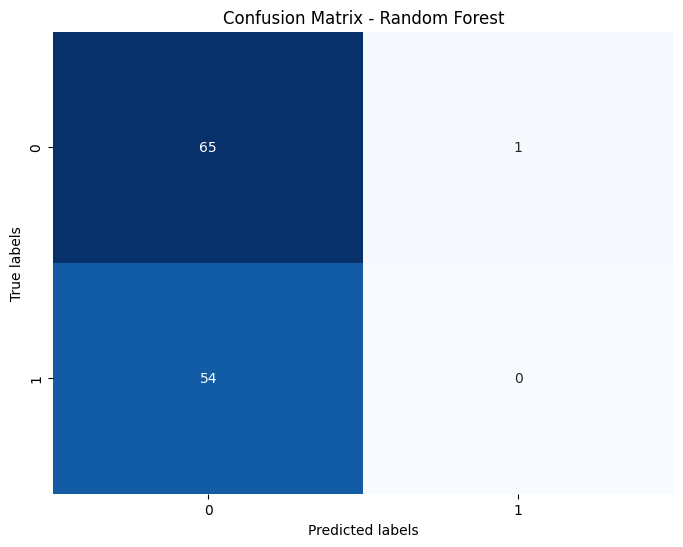

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to convert strings to lists of floats
def convert_string_to_float_list(s):
    try:
        return [float(i) for i in ast.literal_eval(s)]
    except:
        return s

# Flatten the list columns into separate columns
def flatten_columns(df):
    new_df = pd.DataFrame()
    for col in df.columns:
        if isinstance(df[col].iloc[0], list):
            expanded_df = pd.DataFrame(df[col].tolist(), index=df.index)
            expanded_df.columns = [f"{col}_{i}" for i in range(expanded_df.shape[1])]
            new_df = pd.concat([new_df, expanded_df], axis=1)
        else:
            new_df[col] = df[col]
    return new_df

# Load and preprocess features
def load_and_preprocess_features(file_path):
    df = pd.read_csv(file_path)
    for col in df.columns:
        df[col] = df[col].apply(convert_string_to_float_list)
    df = flatten_columns(df)
    return df

# Define file paths for training and test datasets
train_files = [
    'axial_statistical_features.csv', 'coronal_statistical_features.csv', 'sagittal_statistical_features.csv',
    'axial_textural_features.csv', 'coronal_textural_features.csv', 'sagittal_textural_features.csv',
    'axial_sift_features.csv', 'coronal_sift_features.csv', 'sagittal_sift_features.csv'
]

test_files = [
    'axial_statistical_test_features.csv', 'coronal_statistical_test_features.csv', 'sagittal_statistical_test_features.csv',
    'axial_textural_test_features.csv', 'coronal_textural_test_features.csv', 'sagittal_textural_test_features.csv',
    'axial_sift_test_features.csv', 'coronal_sift_test_features.csv', 'sagittal_sift_test_features.csv'
]

# Base directory path
base_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/'

# Load and preprocess training features
train_dfs = [load_and_preprocess_features(base_dir + 'train/' + file) for file in train_files]
X_train_features = pd.concat(train_dfs, axis=1)

# Load and preprocess test features
test_dfs = [load_and_preprocess_features(base_dir + 'valid/' + file) for file in test_files]
X_test_features = pd.concat(test_dfs, axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_features)
X_test_imputed = imputer.transform(X_test_features)

# Load labels
y_train = acl_label
y_test = acl_test_label

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_imputed, y_train)

# Make predictions
y_pred = clf.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


Accuracy: 0.7916666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.04      0.07        25
           1       0.80      0.99      0.88        95

    accuracy                           0.79       120
   macro avg       0.65      0.51      0.48       120
weighted avg       0.73      0.79      0.71       120


Confusion Matrix:
[[ 1 24]
 [ 1 94]]


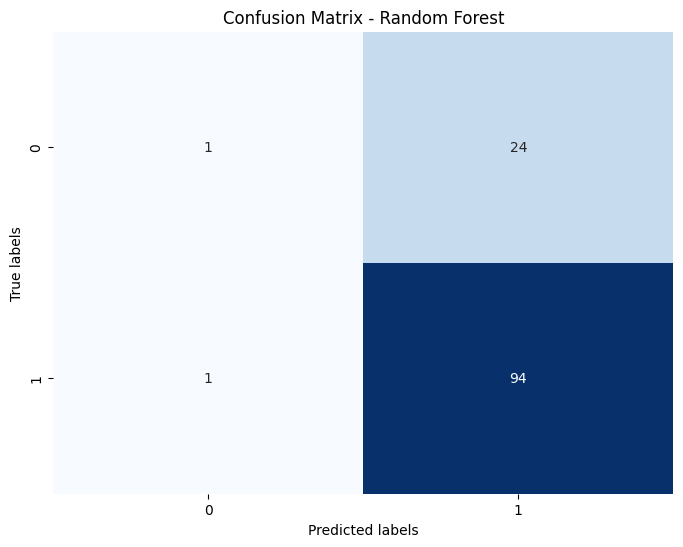

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to convert strings to lists of floats
def convert_string_to_float_list(s):
    try:
        return [float(i) for i in ast.literal_eval(s)]
    except:
        return s

# Flatten the list columns into separate columns
def flatten_columns(df):
    new_df = pd.DataFrame()
    for col in df.columns:
        if isinstance(df[col].iloc[0], list):
            expanded_df = pd.DataFrame(df[col].tolist(), index=df.index)
            expanded_df.columns = [f"{col}_{i}" for i in range(expanded_df.shape[1])]
            new_df = pd.concat([new_df, expanded_df], axis=1)
        else:
            new_df[col] = df[col]
    return new_df

# Load and preprocess features
def load_and_preprocess_features(file_path):
    df = pd.read_csv(file_path)
    for col in df.columns:
        df[col] = df[col].apply(convert_string_to_float_list)
    df = flatten_columns(df)
    return df

# Define file paths for training and test datasets
train_files = [
    'axial_statistical_features.csv', 'coronal_statistical_features.csv', 'sagittal_statistical_features.csv',
    'axial_textural_features.csv', 'coronal_textural_features.csv', 'sagittal_textural_features.csv',
    'axial_sift_features.csv', 'coronal_sift_features.csv', 'sagittal_sift_features.csv'
]

test_files = [
    'axial_statistical_test_features.csv', 'coronal_statistical_test_features.csv', 'sagittal_statistical_test_features.csv',
    'axial_textural_test_features.csv', 'coronal_textural_test_features.csv', 'sagittal_textural_test_features.csv',
    'axial_sift_test_features.csv', 'coronal_sift_test_features.csv', 'sagittal_sift_test_features.csv'
]

# Base directory path
base_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/'

# Load and preprocess training features
train_dfs = [load_and_preprocess_features(base_dir + 'train/' + file) for file in train_files]
X_train_features = pd.concat(train_dfs, axis=1)

# Load and preprocess test features
test_dfs = [load_and_preprocess_features(base_dir + 'valid/' + file) for file in test_files]
X_test_features = pd.concat(test_dfs, axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_features)
X_test_imputed = imputer.transform(X_test_features)

# Load labels
y_train = abnormal_label
y_test = abnormal_test_label

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_imputed, y_train)

# Make predictions
y_pred = clf.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


Accuracy: 0.5833333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.88      0.71        68
           1       0.56      0.19      0.29        52

    accuracy                           0.58       120
   macro avg       0.57      0.54      0.50       120
weighted avg       0.57      0.58      0.52       120


Confusion Matrix:
[[60  8]
 [42 10]]


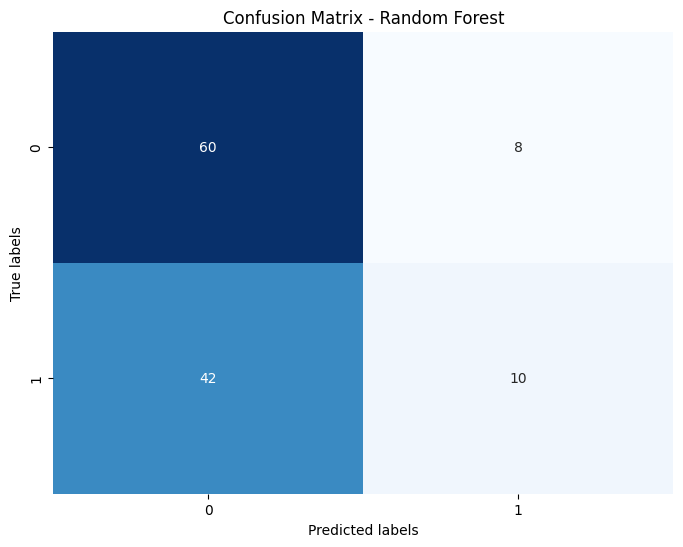

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to convert strings to lists of floats
def convert_string_to_float_list(s):
    try:
        return [float(i) for i in ast.literal_eval(s)]
    except:
        return s

# Flatten the list columns into separate columns
def flatten_columns(df):
    new_df = pd.DataFrame()
    for col in df.columns:
        if isinstance(df[col].iloc[0], list):
            expanded_df = pd.DataFrame(df[col].tolist(), index=df.index)
            expanded_df.columns = [f"{col}_{i}" for i in range(expanded_df.shape[1])]
            new_df = pd.concat([new_df, expanded_df], axis=1)
        else:
            new_df[col] = df[col]
    return new_df

# Load and preprocess features
def load_and_preprocess_features(file_path):
    df = pd.read_csv(file_path)
    for col in df.columns:
        df[col] = df[col].apply(convert_string_to_float_list)
    df = flatten_columns(df)
    return df

# Define file paths for training and test datasets
train_files = [
    'axial_statistical_features.csv', 'coronal_statistical_features.csv', 'sagittal_statistical_features.csv',
    'axial_textural_features.csv', 'coronal_textural_features.csv', 'sagittal_textural_features.csv',
    'axial_sift_features.csv', 'coronal_sift_features.csv', 'sagittal_sift_features.csv'
]

test_files = [
    'axial_statistical_test_features.csv', 'coronal_statistical_test_features.csv', 'sagittal_statistical_test_features.csv',
    'axial_textural_test_features.csv', 'coronal_textural_test_features.csv', 'sagittal_textural_test_features.csv',
    'axial_sift_test_features.csv', 'coronal_sift_test_features.csv', 'sagittal_sift_test_features.csv'
]

# Base directory path
base_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/'

# Load and preprocess training features
train_dfs = [load_and_preprocess_features(base_dir + 'train/' + file) for file in train_files]
X_train_features = pd.concat(train_dfs, axis=1)

# Load and preprocess test features
test_dfs = [load_and_preprocess_features(base_dir + 'valid/' + file) for file in test_files]
X_test_features = pd.concat(test_dfs, axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_features)
X_test_imputed = imputer.transform(X_test_features)

# Load labels
y_train = meniscus_label
y_test = meniscus_test_label

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_imputed, y_train)

# Make predictions
y_pred = clf.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


Accuracy: 0.55

Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        66
           1       0.00      0.00      0.00        54

    accuracy                           0.55       120
   macro avg       0.28      0.50      0.35       120
weighted avg       0.30      0.55      0.39       120


Confusion Matrix:
[[66  0]
 [54  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


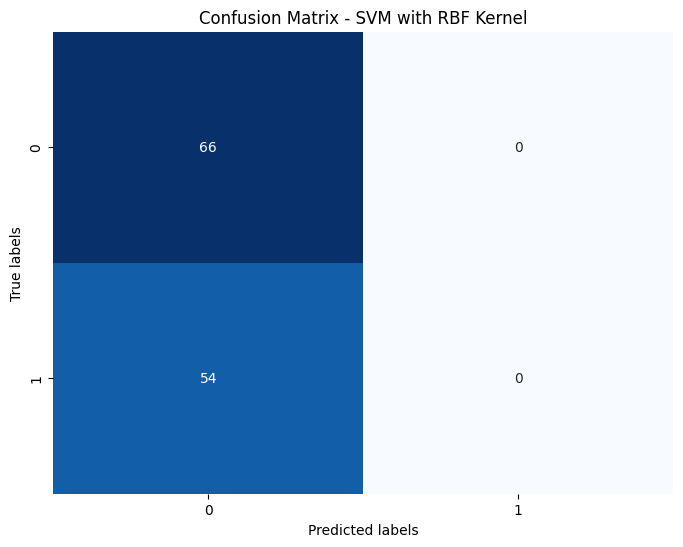

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to convert strings to lists of floats
def convert_string_to_float_list(s):
    try:
        return [float(i) for i in ast.literal_eval(s)]
    except:
        return s

# Flatten the list columns into separate columns
def flatten_columns(df):
    new_df = pd.DataFrame()
    for col in df.columns:
        if isinstance(df[col].iloc[0], list):
            expanded_df = pd.DataFrame(df[col].tolist(), index=df.index)
            expanded_df.columns = [f"{col}_{i}" for i in range(expanded_df.shape[1])]
            new_df = pd.concat([new_df, expanded_df], axis=1)
        else:
            new_df[col] = df[col]
    return new_df

# Load and preprocess features
def load_and_preprocess_features(file_path):
    df = pd.read_csv(file_path)
    for col in df.columns:
        df[col] = df[col].apply(convert_string_to_float_list)
    df = flatten_columns(df)
    return df

# Define file paths for training and test datasets
train_files = [
    'axial_statistical_features.csv', 'coronal_statistical_features.csv', 'sagittal_statistical_features.csv',
    'axial_textural_features.csv', 'coronal_textural_features.csv', 'sagittal_textural_features.csv',
    'axial_sift_features.csv', 'coronal_sift_features.csv', 'sagittal_sift_features.csv'
]

test_files = [
    'axial_statistical_test_features.csv', 'coronal_statistical_test_features.csv', 'sagittal_statistical_test_features.csv',
    'axial_textural_test_features.csv', 'coronal_textural_test_features.csv', 'sagittal_textural_test_features.csv',
    'axial_sift_test_features.csv', 'coronal_sift_test_features.csv', 'sagittal_sift_test_features.csv'
]

# Base directory path
base_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/'

# Load and preprocess training features
train_dfs = [load_and_preprocess_features(base_dir + 'train/' + file) for file in train_files]
X_train_features = pd.concat(train_dfs, axis=1)

# Load and preprocess test features
test_dfs = [load_and_preprocess_features(base_dir + 'valid/' + file) for file in test_files]
X_test_features = pd.concat(test_dfs, axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_features)
X_test_imputed = imputer.transform(X_test_features)

# Load labels
y_train = acl_label
y_test = acl_test_label

# Train SVM classifier with RBF kernel
clf = SVC(kernel='rbf', gamma='scale', random_state=0)
clf.fit(X_train_imputed, y_train)

# Make predictions
y_pred = clf.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM with RBF Kernel')
plt.show()


Accuracy: 0.7916666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.79      1.00      0.88        95

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120


Confusion Matrix:
[[ 0 25]
 [ 0 95]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


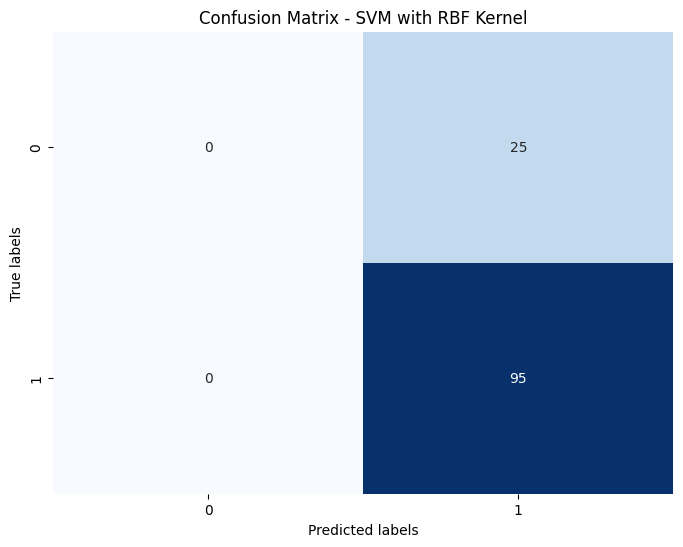

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to convert strings to lists of floats
def convert_string_to_float_list(s):
    try:
        return [float(i) for i in ast.literal_eval(s)]
    except:
        return s

# Flatten the list columns into separate columns
def flatten_columns(df):
    new_df = pd.DataFrame()
    for col in df.columns:
        if isinstance(df[col].iloc[0], list):
            expanded_df = pd.DataFrame(df[col].tolist(), index=df.index)
            expanded_df.columns = [f"{col}_{i}" for i in range(expanded_df.shape[1])]
            new_df = pd.concat([new_df, expanded_df], axis=1)
        else:
            new_df[col] = df[col]
    return new_df

# Load and preprocess features
def load_and_preprocess_features(file_path):
    df = pd.read_csv(file_path)
    for col in df.columns:
        df[col] = df[col].apply(convert_string_to_float_list)
    df = flatten_columns(df)
    return df

# Define file paths for training and test datasets
train_files = [
    'axial_statistical_features.csv', 'coronal_statistical_features.csv', 'sagittal_statistical_features.csv',
    'axial_textural_features.csv', 'coronal_textural_features.csv', 'sagittal_textural_features.csv',
    'axial_sift_features.csv', 'coronal_sift_features.csv', 'sagittal_sift_features.csv'
]

test_files = [
    'axial_statistical_test_features.csv', 'coronal_statistical_test_features.csv', 'sagittal_statistical_test_features.csv',
    'axial_textural_test_features.csv', 'coronal_textural_test_features.csv', 'sagittal_textural_test_features.csv',
    'axial_sift_test_features.csv', 'coronal_sift_test_features.csv', 'sagittal_sift_test_features.csv'
]

# Base directory path
base_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/'

# Load and preprocess training features
train_dfs = [load_and_preprocess_features(base_dir + 'train/' + file) for file in train_files]
X_train_features = pd.concat(train_dfs, axis=1)

# Load and preprocess test features
test_dfs = [load_and_preprocess_features(base_dir + 'valid/' + file) for file in test_files]
X_test_features = pd.concat(test_dfs, axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_features)
X_test_imputed = imputer.transform(X_test_features)

# Load labels
y_train = abnormal_label
y_test = abnormal_test_label

# Train SVM classifier with RBF kernel
clf = SVC(kernel='rbf', gamma='scale', random_state=0)
clf.fit(X_train_imputed, y_train)

# Make predictions
y_pred = clf.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM with RBF Kernel')
plt.show()


Accuracy: 0.5666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        68
           1       0.00      0.00      0.00        52

    accuracy                           0.57       120
   macro avg       0.28      0.50      0.36       120
weighted avg       0.32      0.57      0.41       120


Confusion Matrix:
[[68  0]
 [52  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


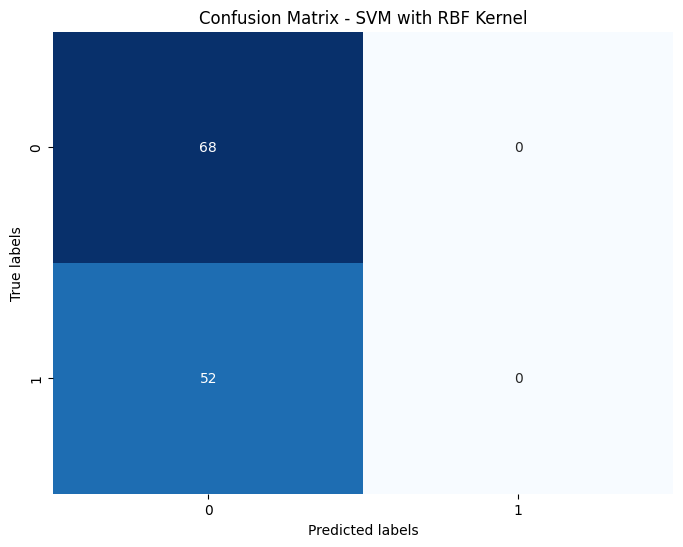

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to convert strings to lists of floats
def convert_string_to_float_list(s):
    try:
        return [float(i) for i in ast.literal_eval(s)]
    except:
        return s

# Flatten the list columns into separate columns
def flatten_columns(df):
    new_df = pd.DataFrame()
    for col in df.columns:
        if isinstance(df[col].iloc[0], list):
            expanded_df = pd.DataFrame(df[col].tolist(), index=df.index)
            expanded_df.columns = [f"{col}_{i}" for i in range(expanded_df.shape[1])]
            new_df = pd.concat([new_df, expanded_df], axis=1)
        else:
            new_df[col] = df[col]
    return new_df

# Load and preprocess features
def load_and_preprocess_features(file_path):
    df = pd.read_csv(file_path)
    for col in df.columns:
        df[col] = df[col].apply(convert_string_to_float_list)
    df = flatten_columns(df)
    return df

# Define file paths for training and test datasets
train_files = [
    'axial_statistical_features.csv', 'coronal_statistical_features.csv', 'sagittal_statistical_features.csv',
    'axial_textural_features.csv', 'coronal_textural_features.csv', 'sagittal_textural_features.csv',
    'axial_sift_features.csv', 'coronal_sift_features.csv', 'sagittal_sift_features.csv'
]

test_files = [
    'axial_statistical_test_features.csv', 'coronal_statistical_test_features.csv', 'sagittal_statistical_test_features.csv',
    'axial_textural_test_features.csv', 'coronal_textural_test_features.csv', 'sagittal_textural_test_features.csv',
    'axial_sift_test_features.csv', 'coronal_sift_test_features.csv', 'sagittal_sift_test_features.csv'
]

# Base directory path
base_dir = '/content/gdrive/MyDrive/Dataset/MRNet-v1.0/'

# Load and preprocess training features
train_dfs = [load_and_preprocess_features(base_dir + 'train/' + file) for file in train_files]
X_train_features = pd.concat(train_dfs, axis=1)

# Load and preprocess test features
test_dfs = [load_and_preprocess_features(base_dir + 'valid/' + file) for file in test_files]
X_test_features = pd.concat(test_dfs, axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_features)
X_test_imputed = imputer.transform(X_test_features)

# Load labels
y_train = meniscus_label
y_test = meniscus_test_label

# Train SVM classifier with RBF kernel
clf = SVC(kernel='rbf', gamma='scale', random_state=0)
clf.fit(X_train_imputed, y_train)

# Make predictions
y_pred = clf.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM with RBF Kernel')
plt.show()


In [ ]:
X_train_features.columns.shape, X_test_features.columns.shape

((432,), (432,))

In [ ]:
axial_stat_train_features.columns.shape, axial_stat_test_features.columns.shape

((9,), (9,))

In [ ]:
coronal_stat_train_features.columns.shape, coronal_stat_test_features.columns.shape

((9,), (9,))

In [ ]:
sagittal_stat_train_features.columns.shape, sagittal_stat_test_features.columns.shape

((9,), (9,))

In [ ]:
axial_text_train_features.columns.shape, axial_text_test_features.columns.shape

((6,), (6,))

In [ ]:
coronal_text_train_features.columns.shape, coronal_text_test_features.columns.shape

((6,), (6,))

In [ ]:
sagittal_text_train_features.columns.shape, sagittal_text_test_features.columns.shape

((6,), (6,))

In [ ]:
axial_hog_train_features.columns.shape, axial_hog_test_features.columns.shape

((385,), (385,))

In [ ]:
coronal_hog_train_features.columns.shape, coronal_hog_test_features.columns.shape

((385,), (385,))

In [ ]:
sagittal_hog_train_features.columns.shape, sagittal_hog_test_features.columns.shape

((385,), (2049,))

In [ ]:
axial_sift_train_features.columns.shape, axial_sift_test_features.columns.shape

((129,), (129,))

In [ ]:
coronal_sift_train_features.columns.shape, coronal_sift_test_features.columns.shape

((129,), (129,))

In [ ]:
sagittal_sift_train_features.columns.shape, sagittal_sift_test_features.columns.shape

((129,), (129,))